In [2]:

import pandas as pd

# Load the electoral data
electoral_data_path = '/workspaces/Electoral-Economic-Analysis/electoral_analysis/processed_electoral_data.csv'
electoral_data = pd.read_csv(electoral_data_path)

# Load the economic data
economic_data_path = '/workspaces/Electoral-Economic-Analysis/electoral_analysis/processed_bea_economic_growth.csv'
economic_data = pd.read_csv(economic_data_path)



/tmp/ipykernel_36761/2237554238.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # One row, two columns for subplots


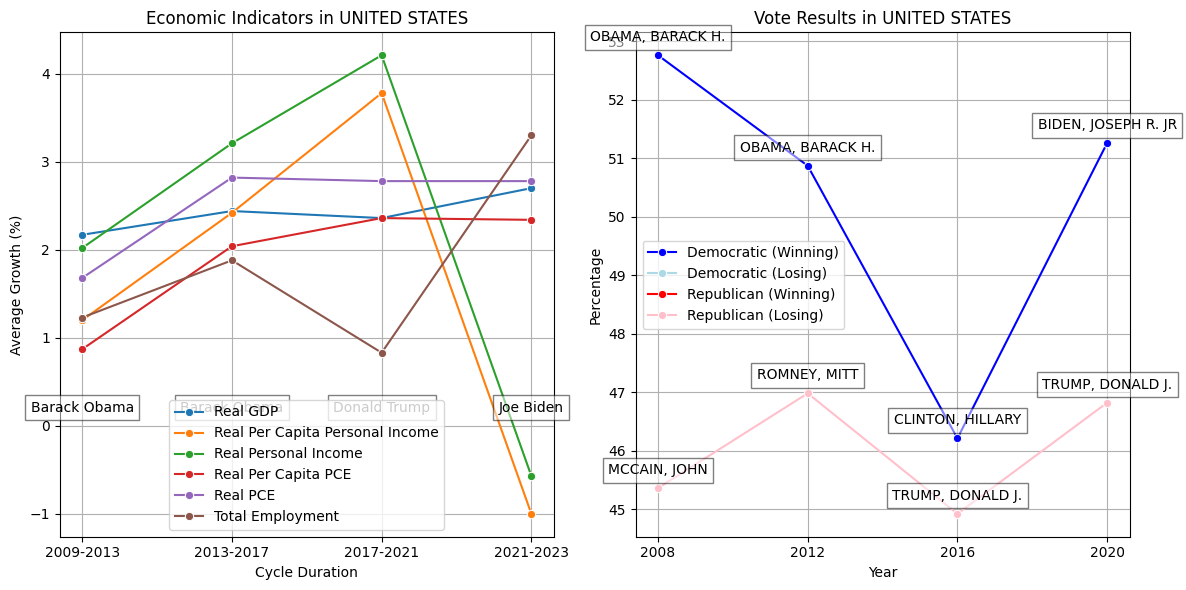

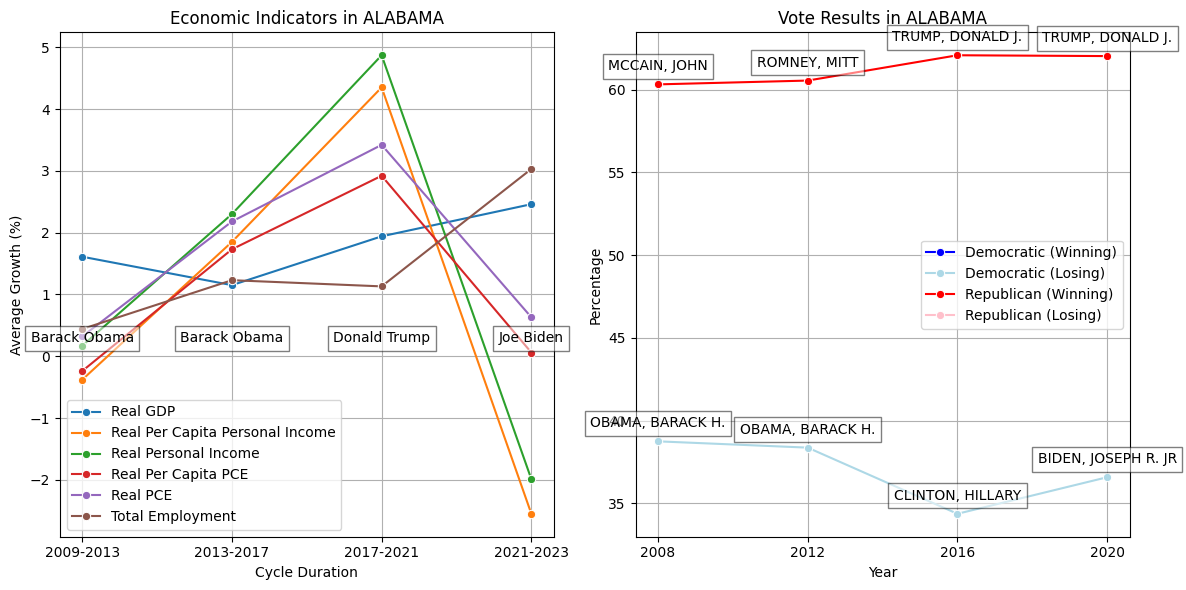

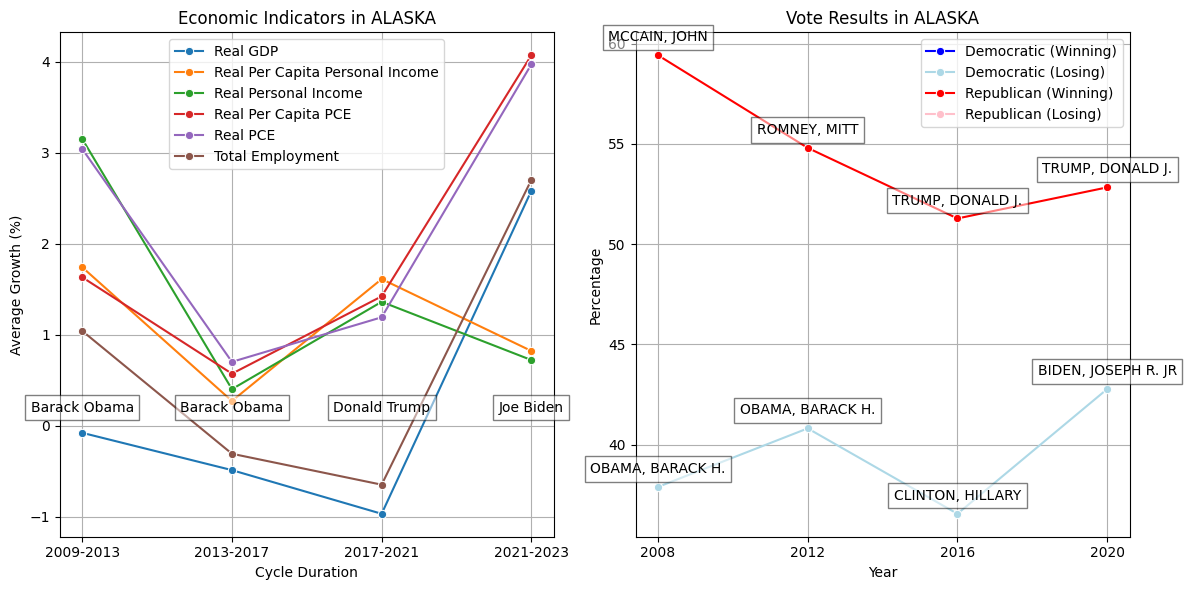

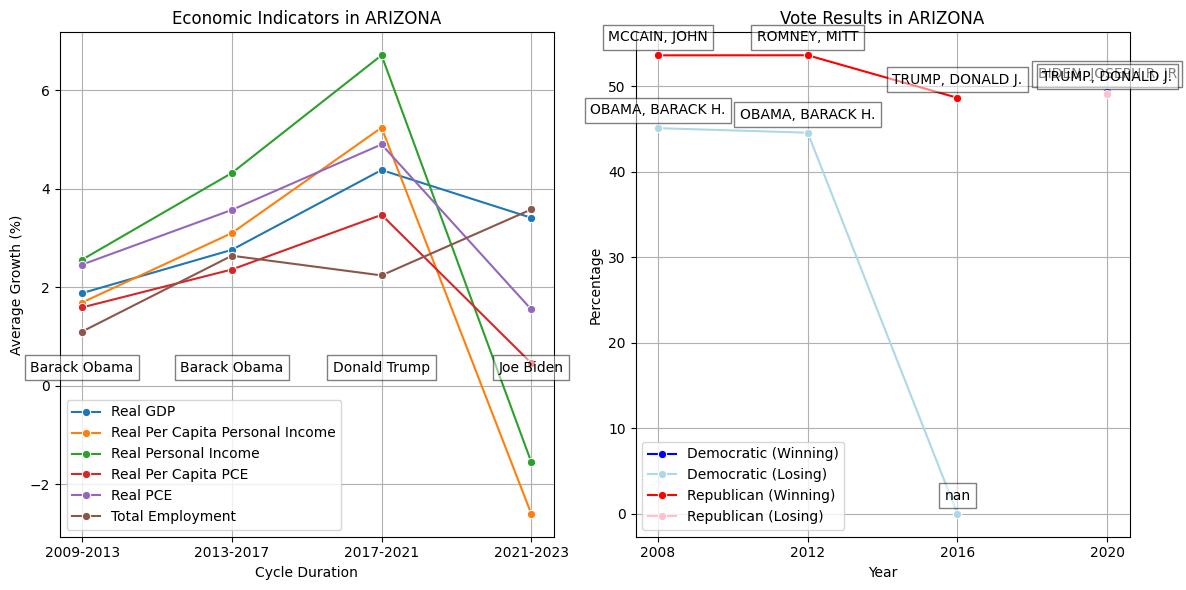

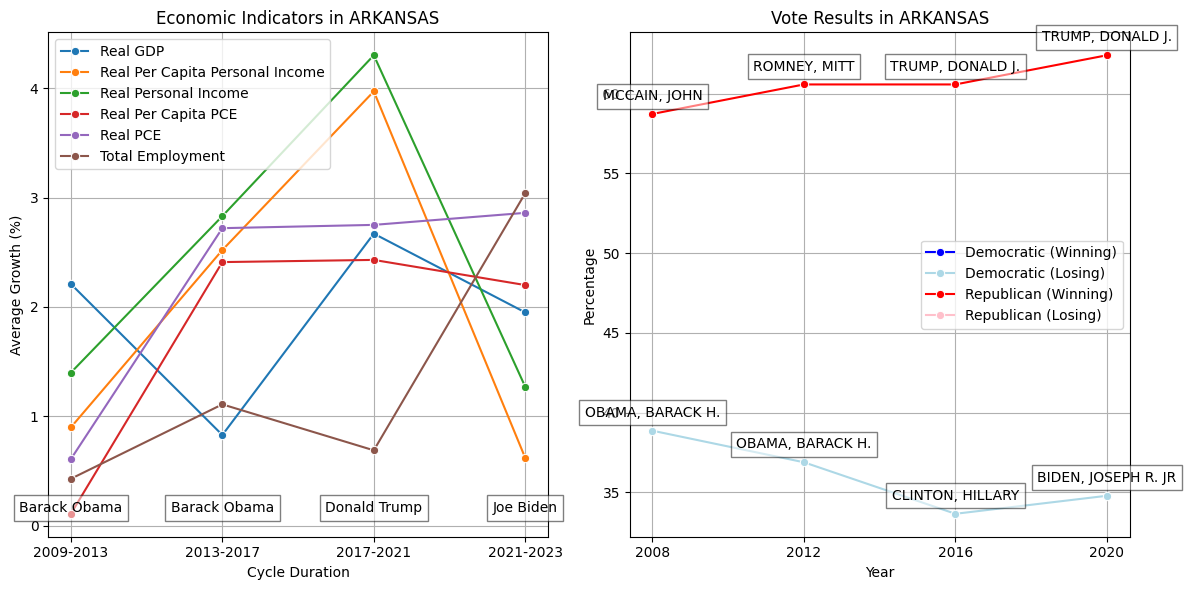

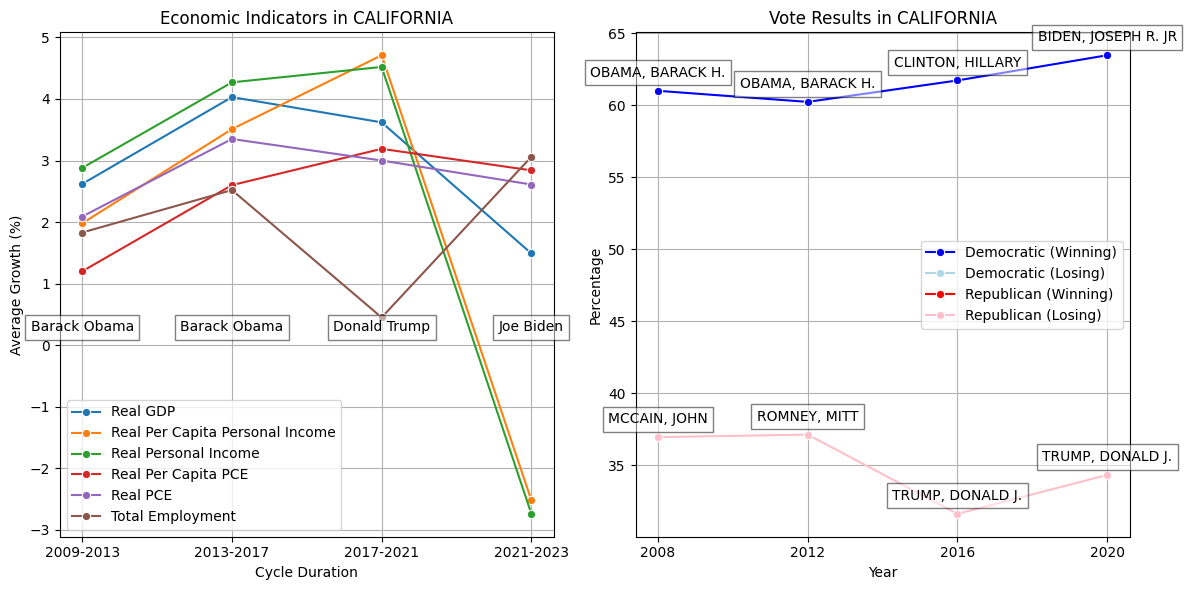

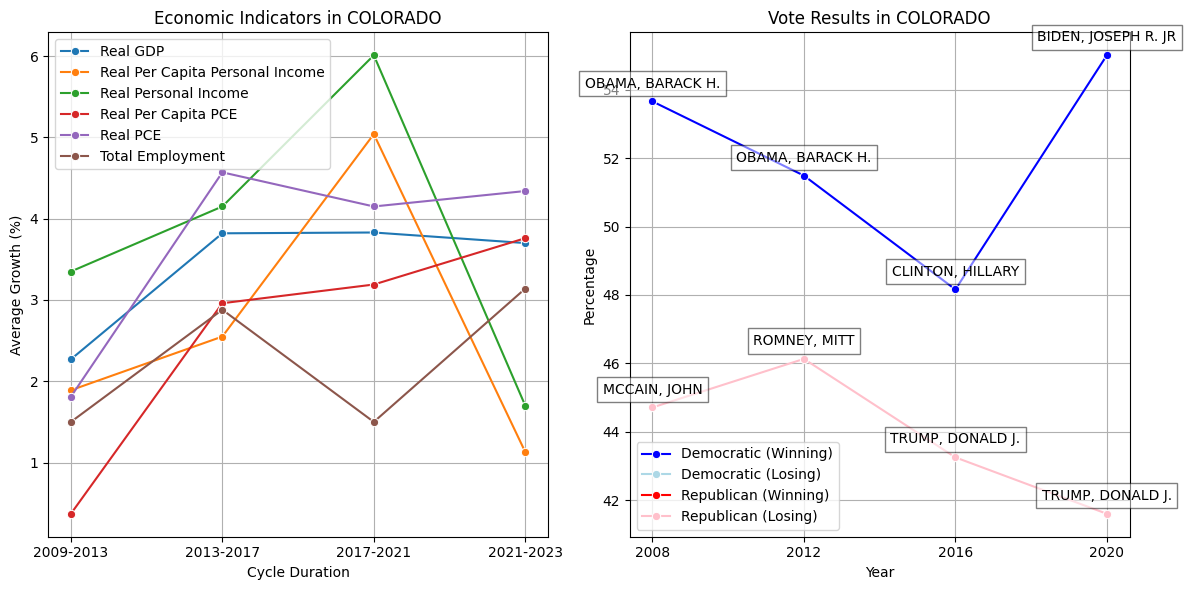

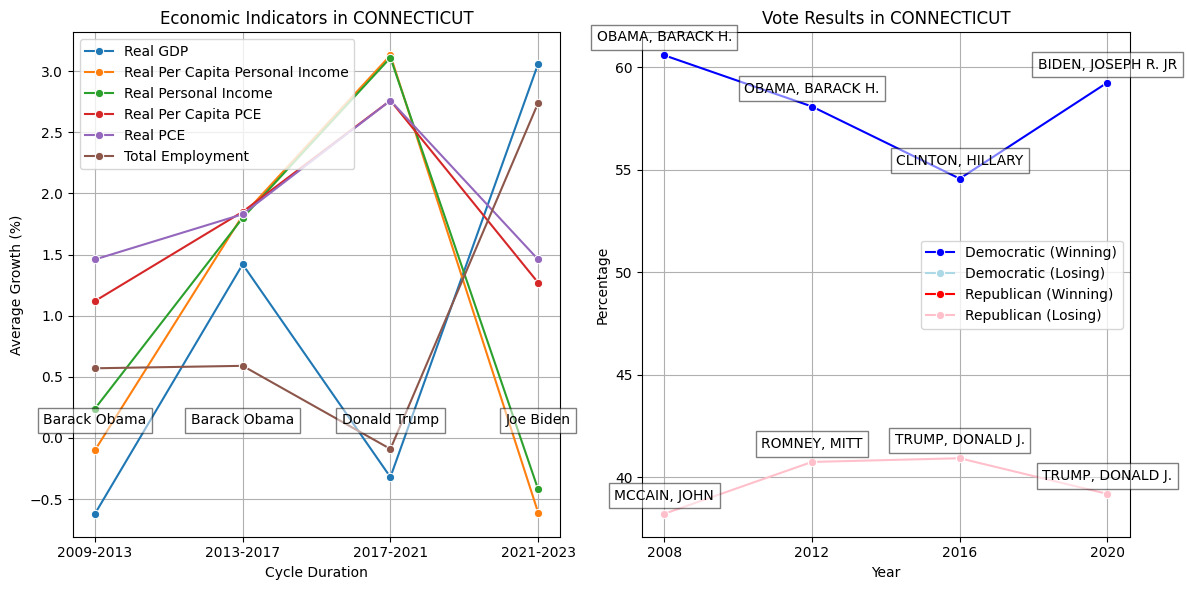

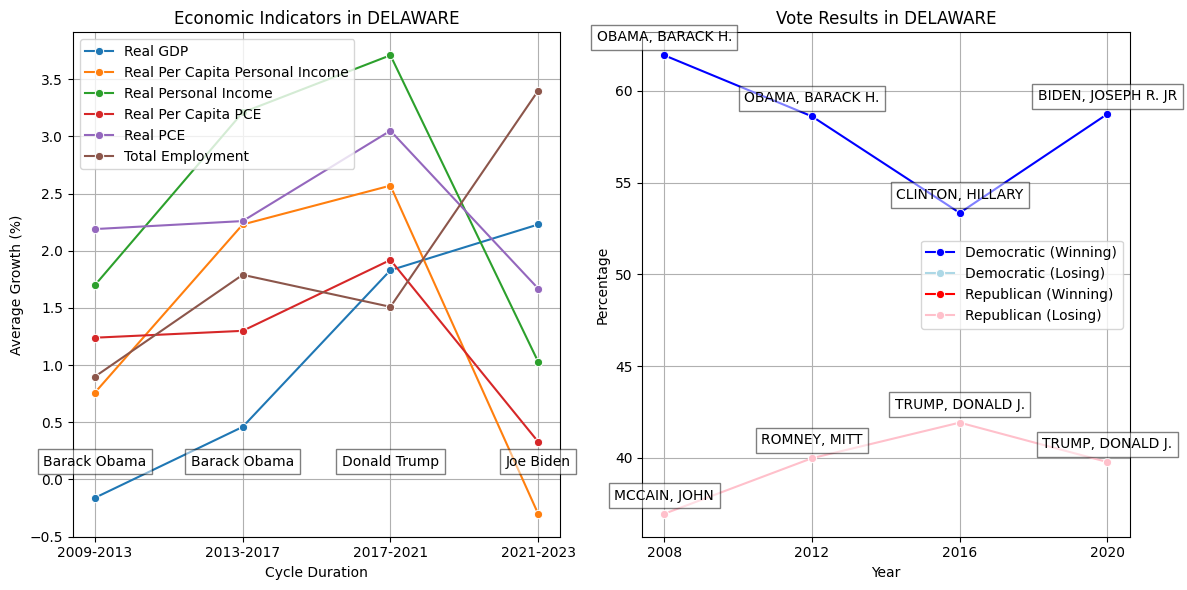

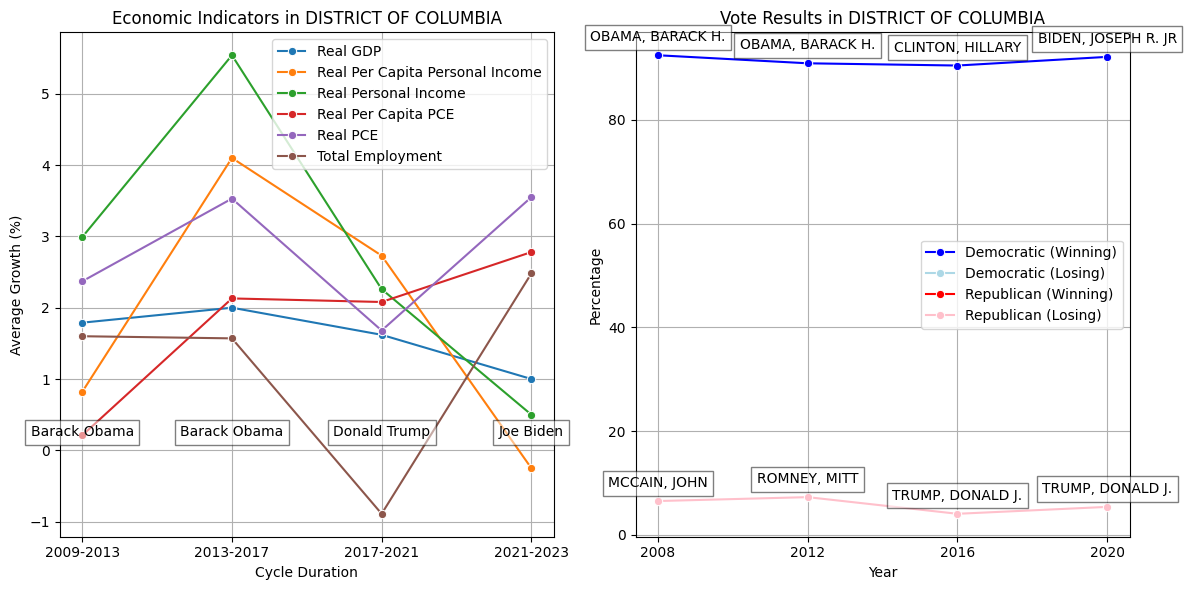

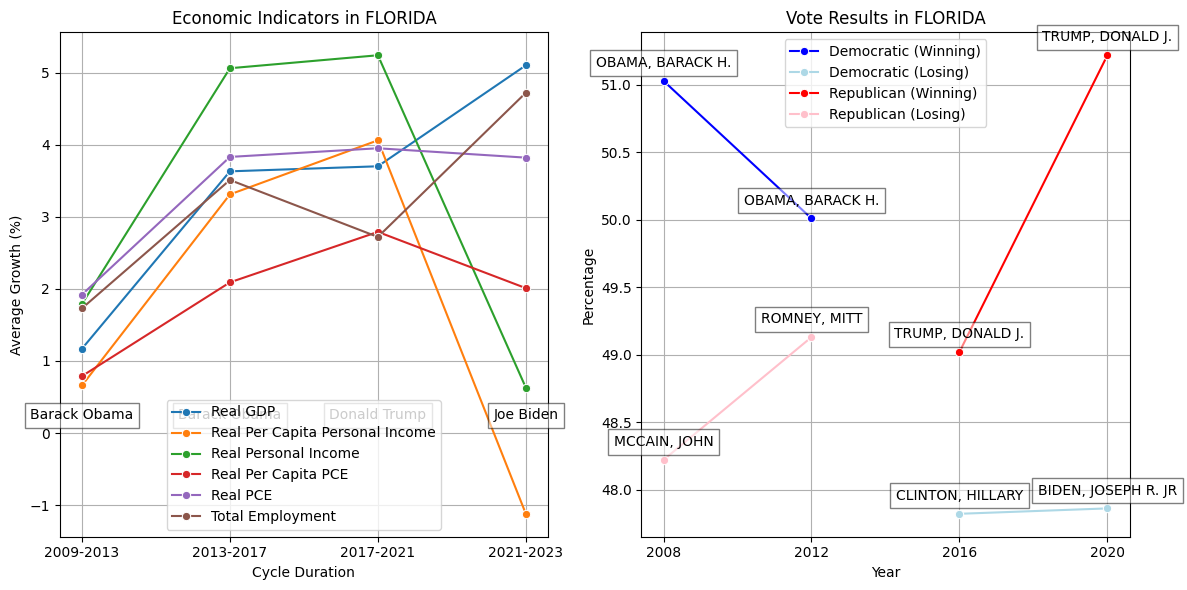

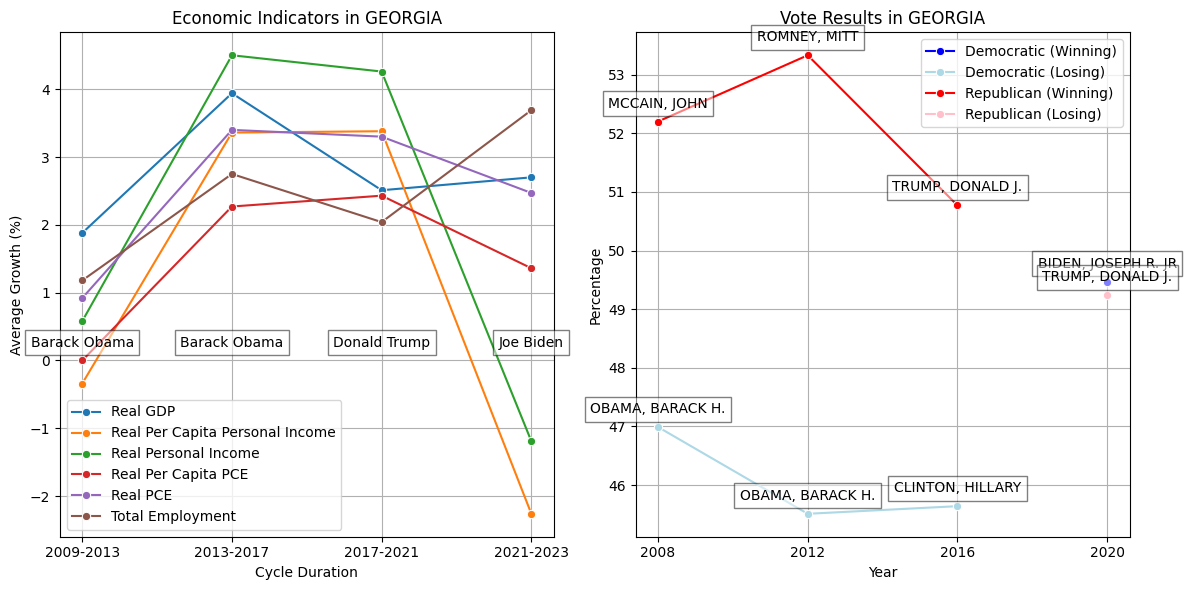

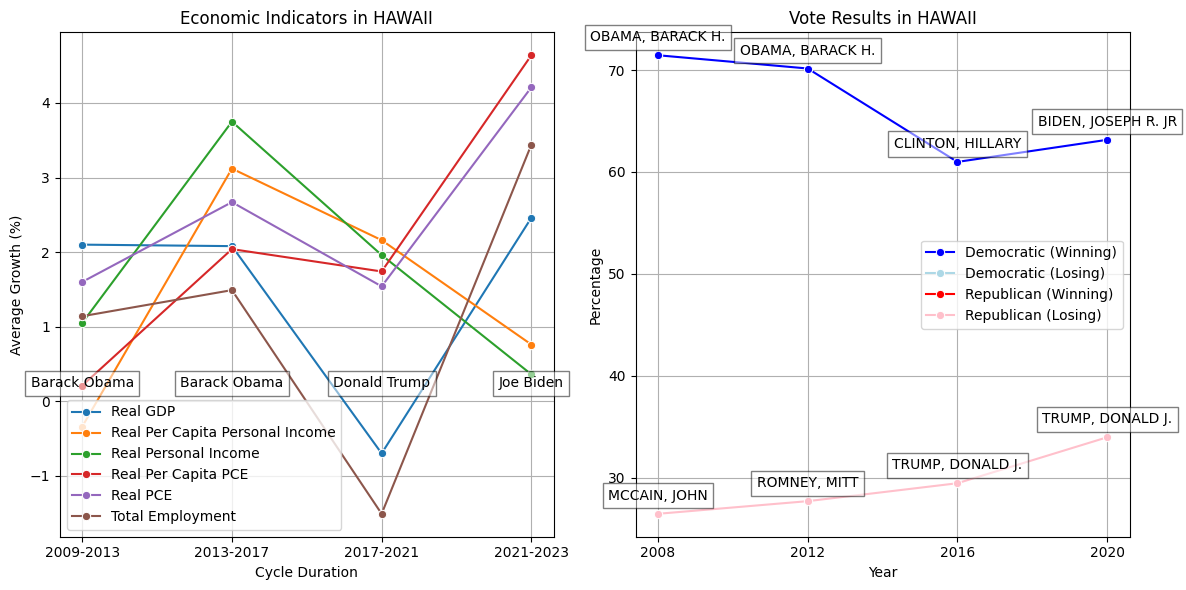

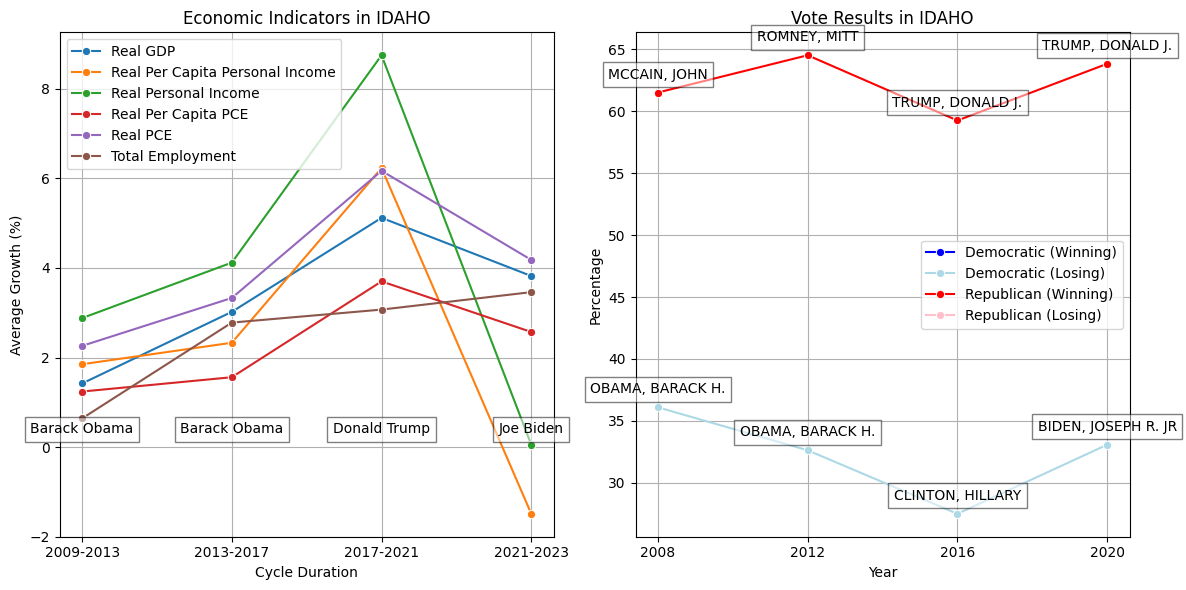

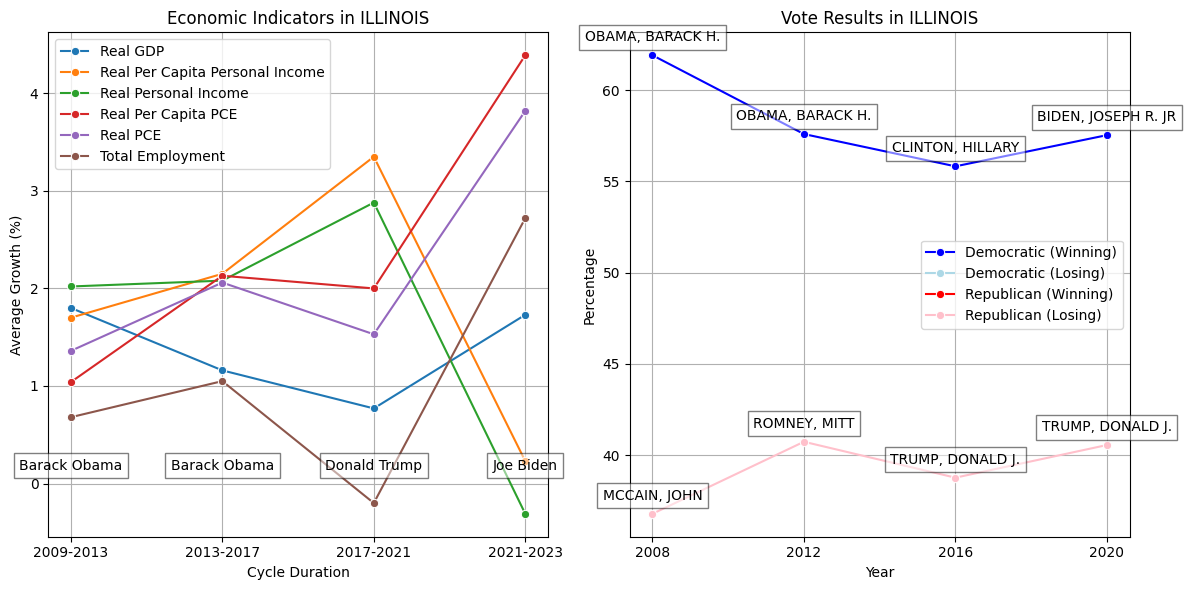

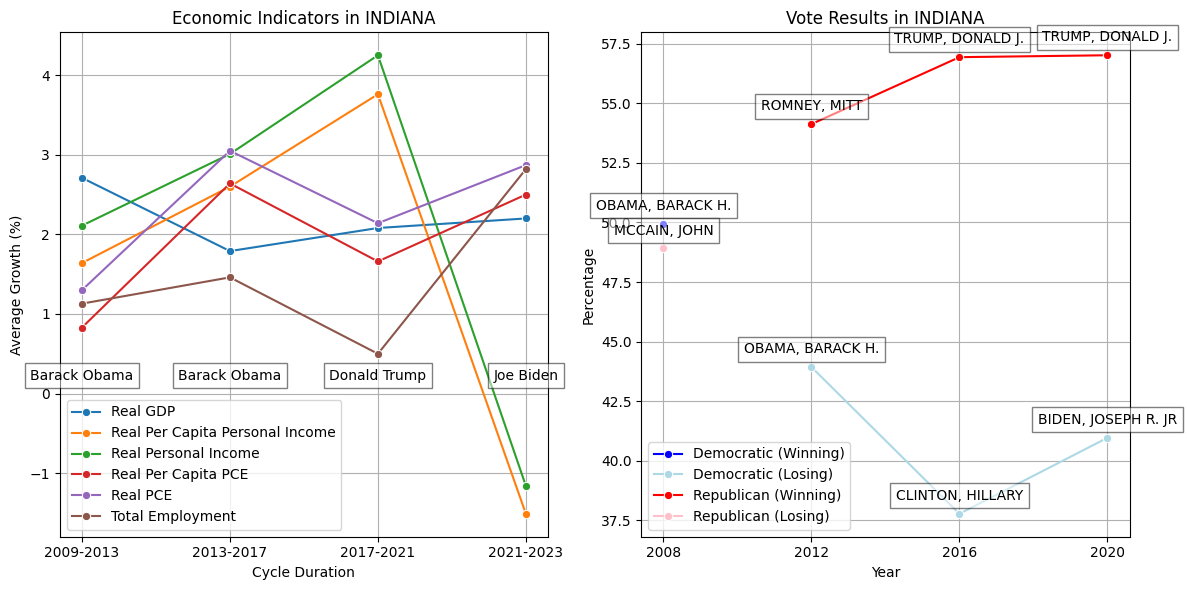

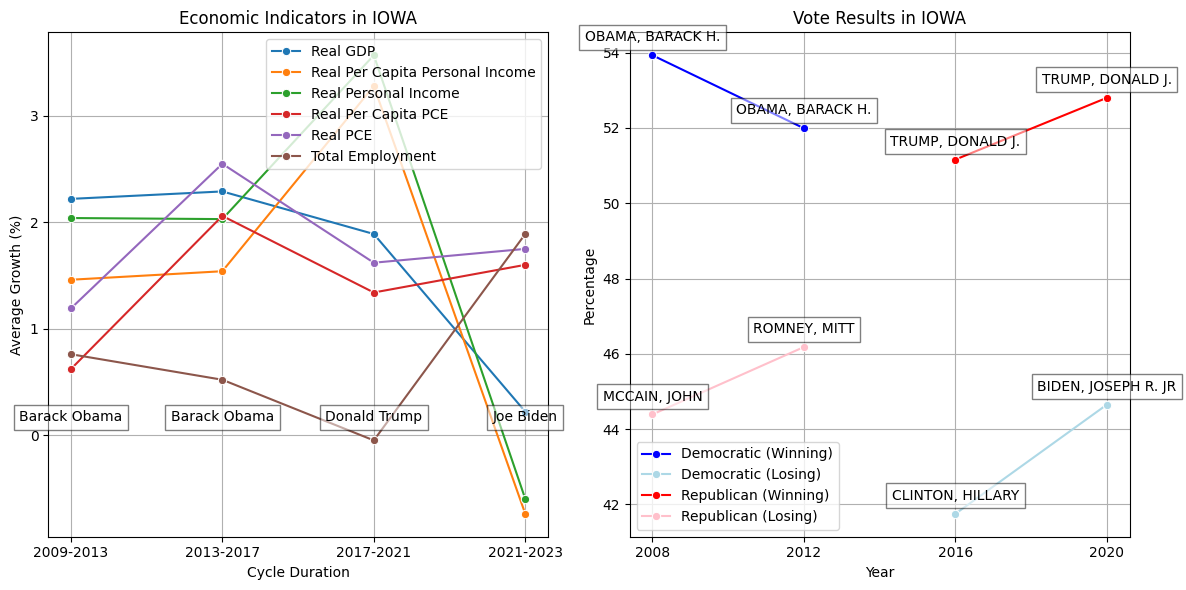

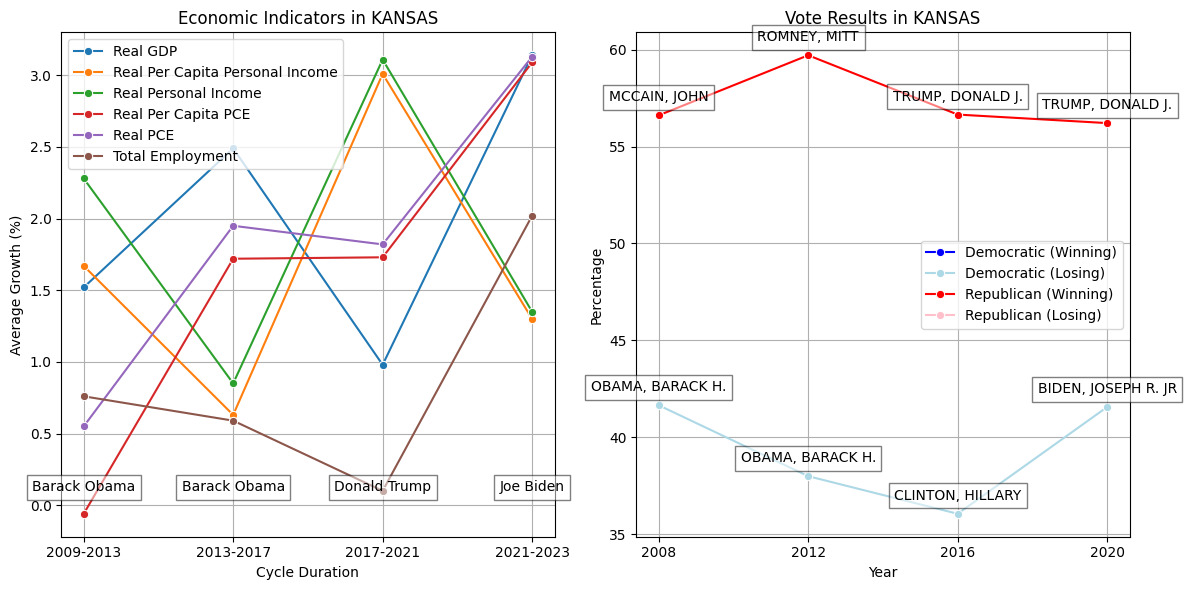

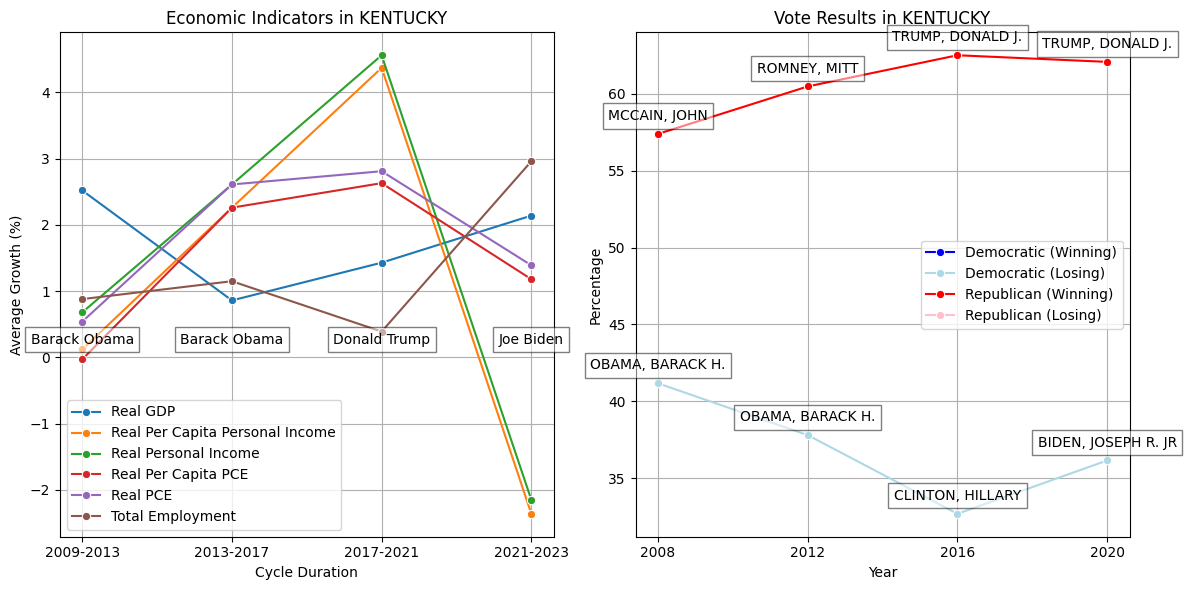

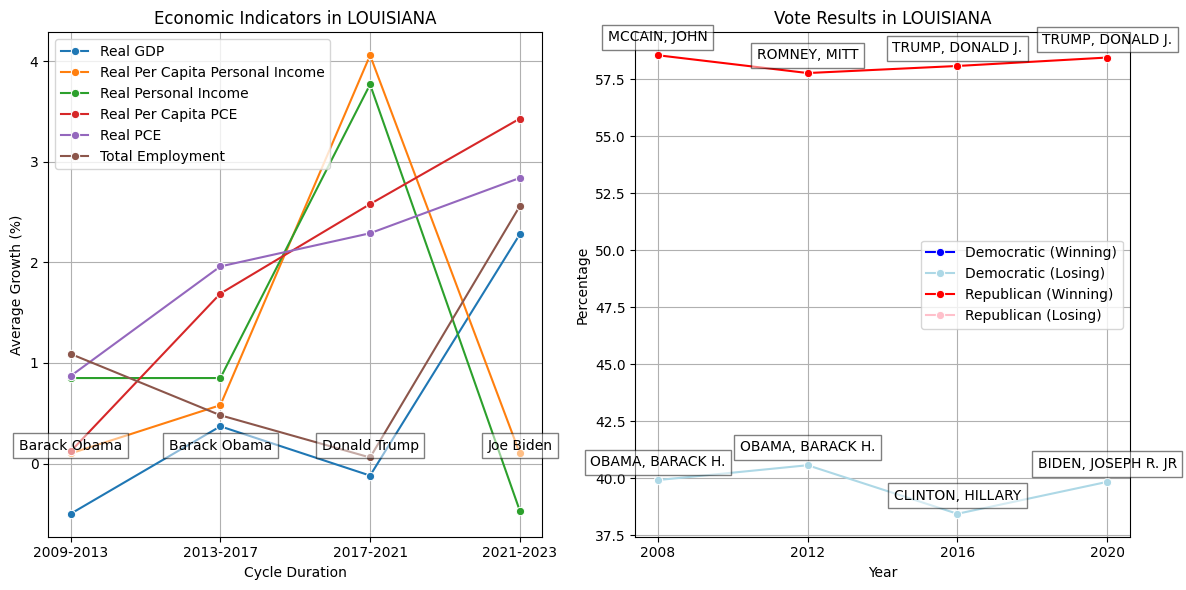

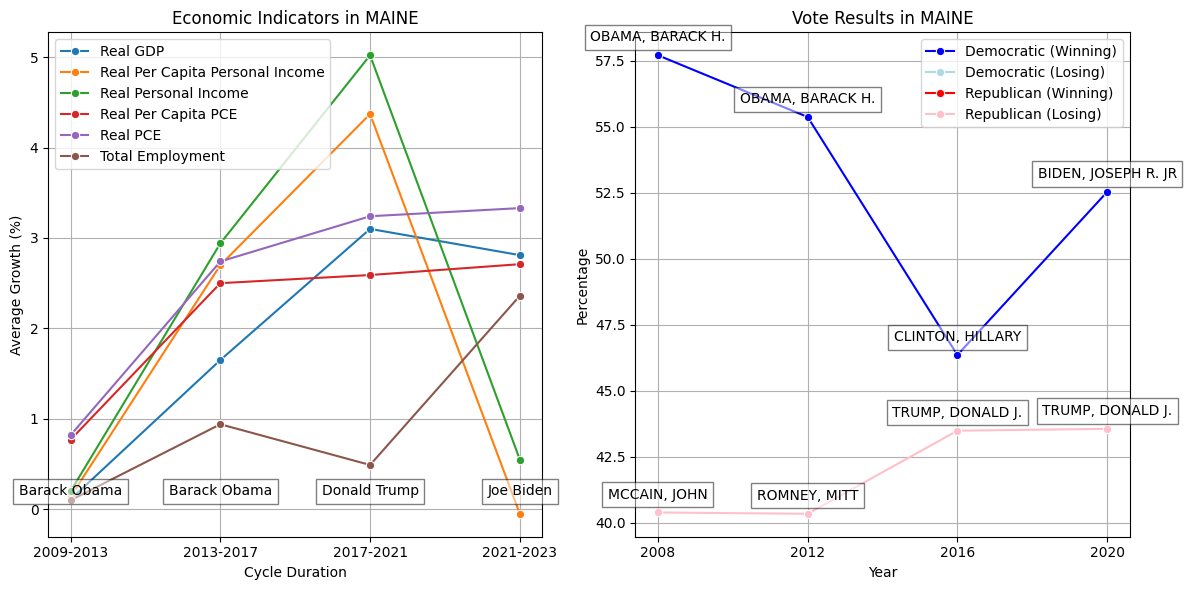

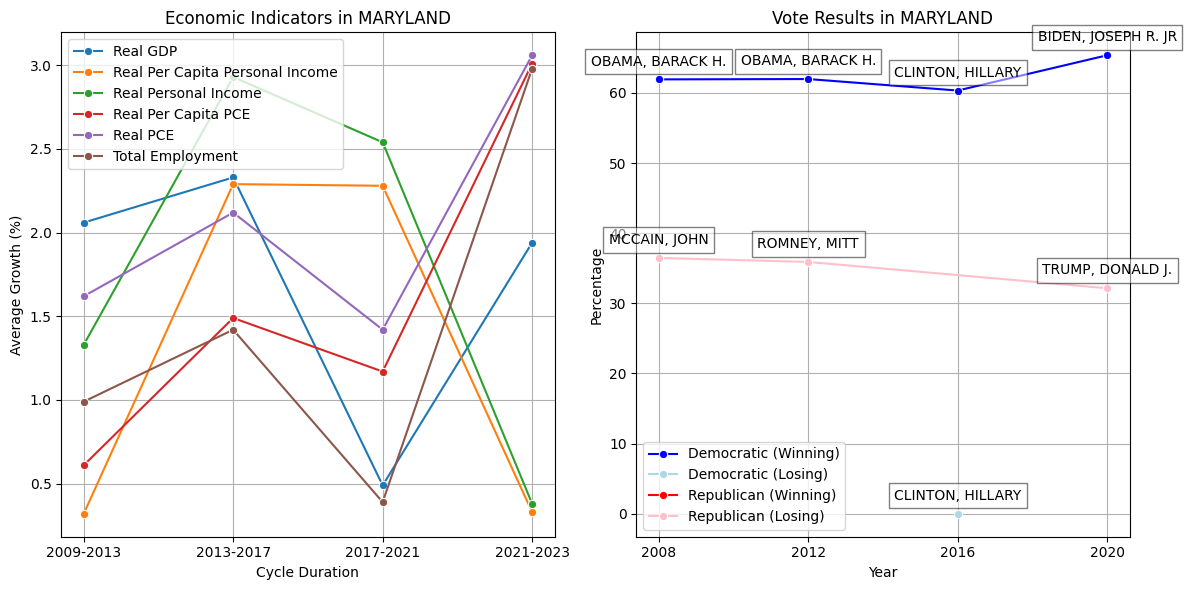

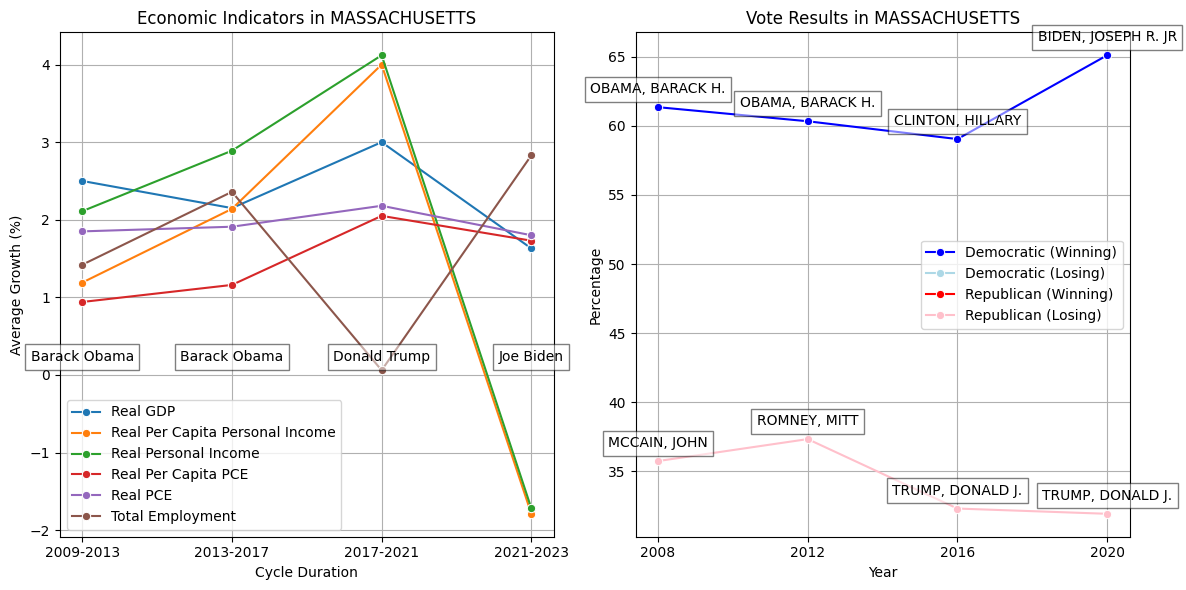

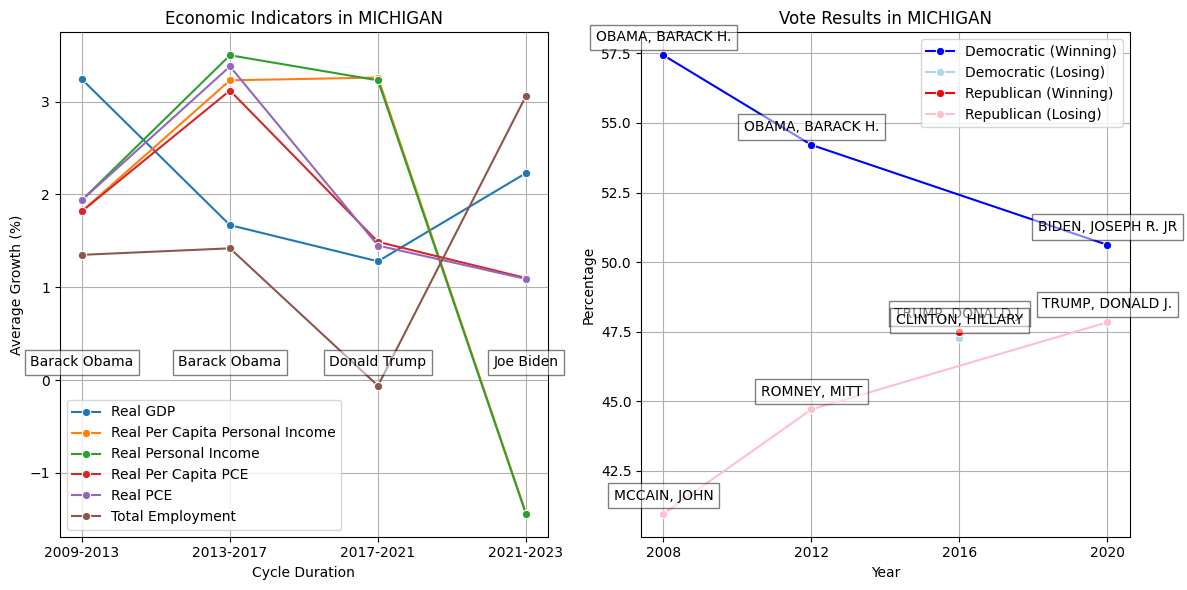

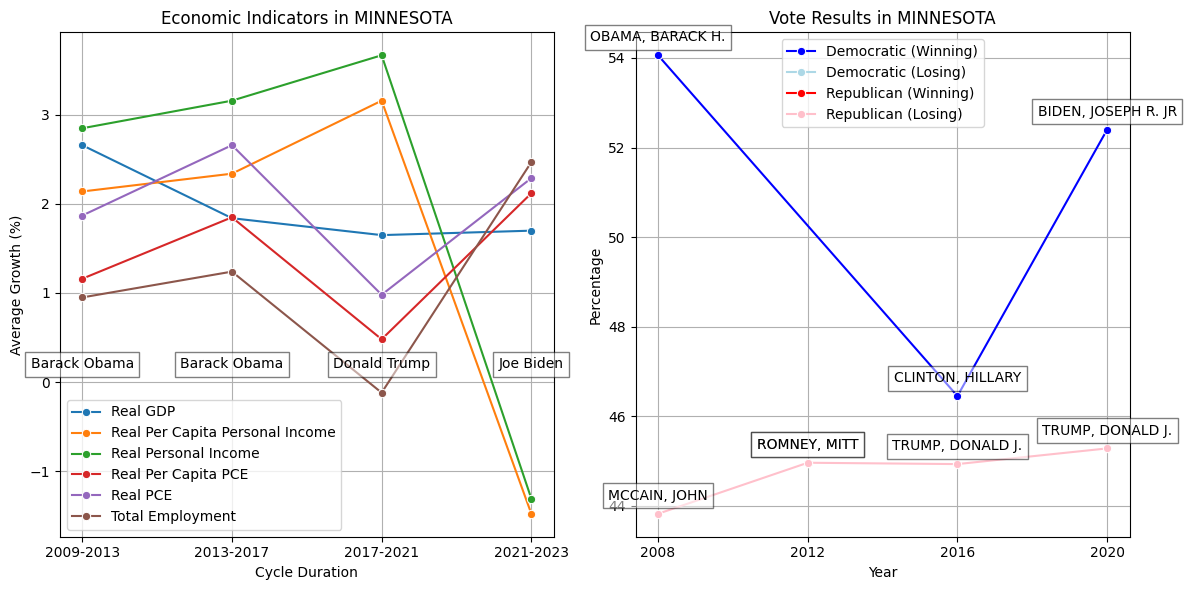

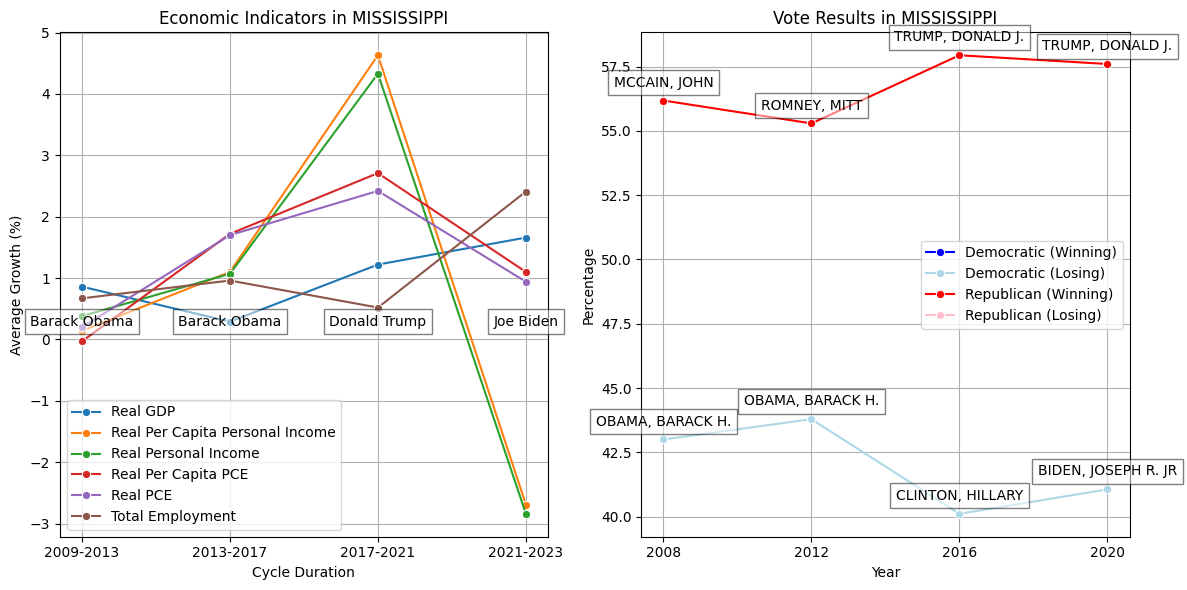

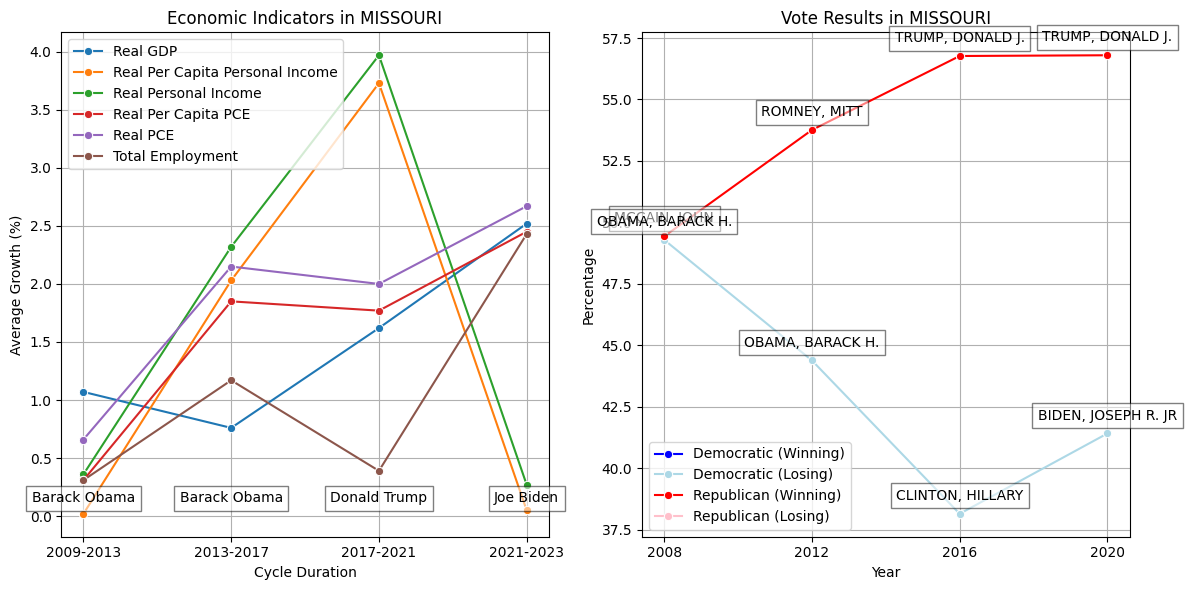

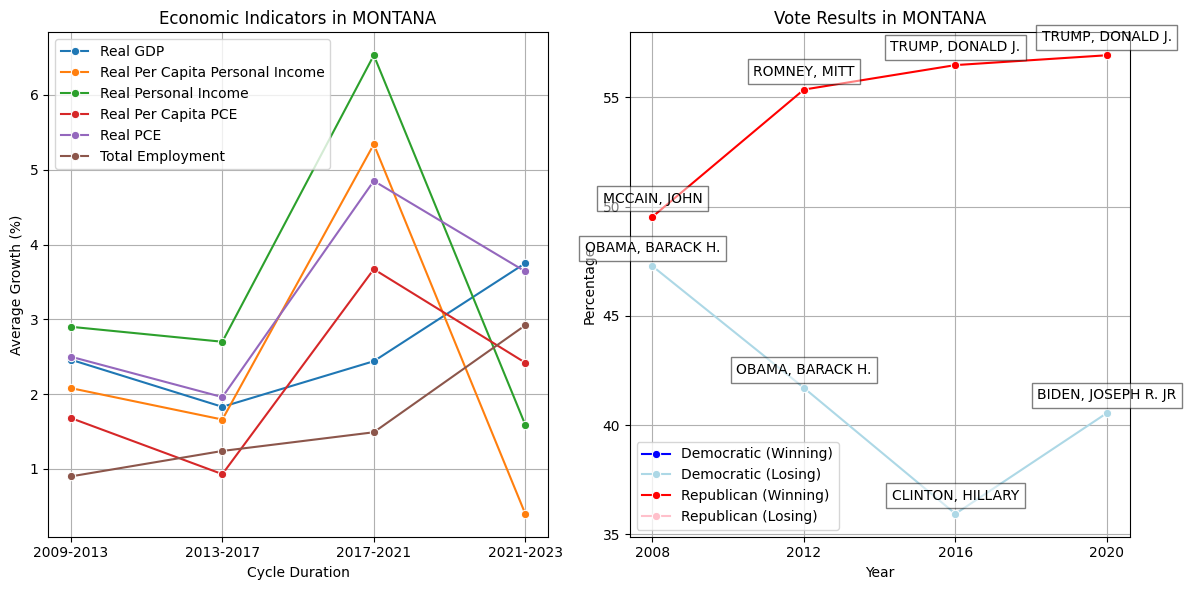

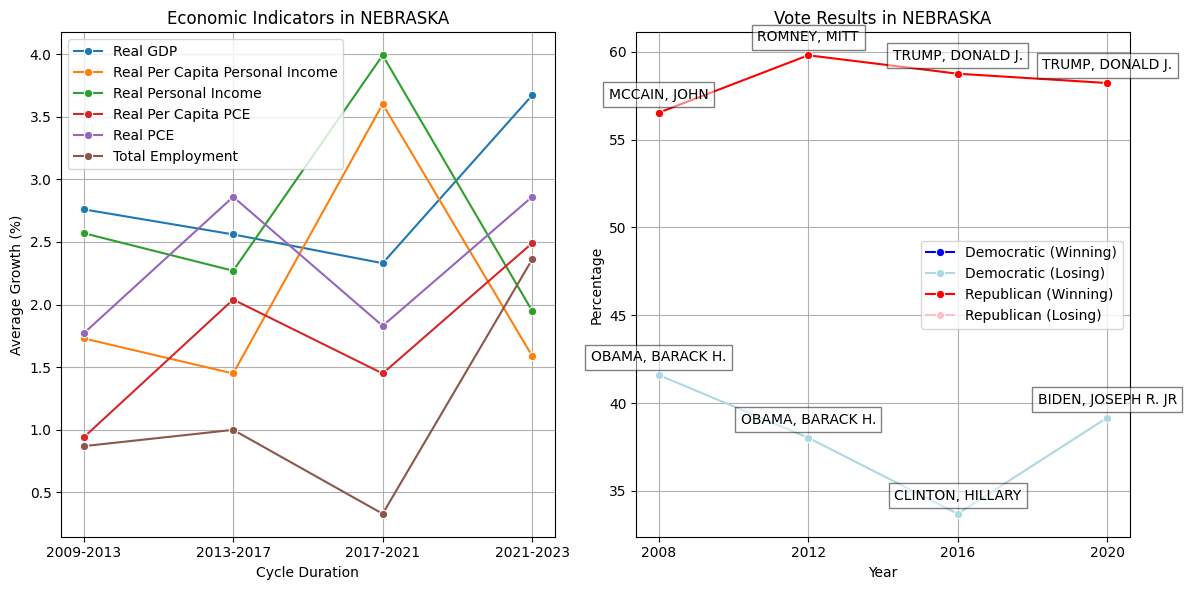

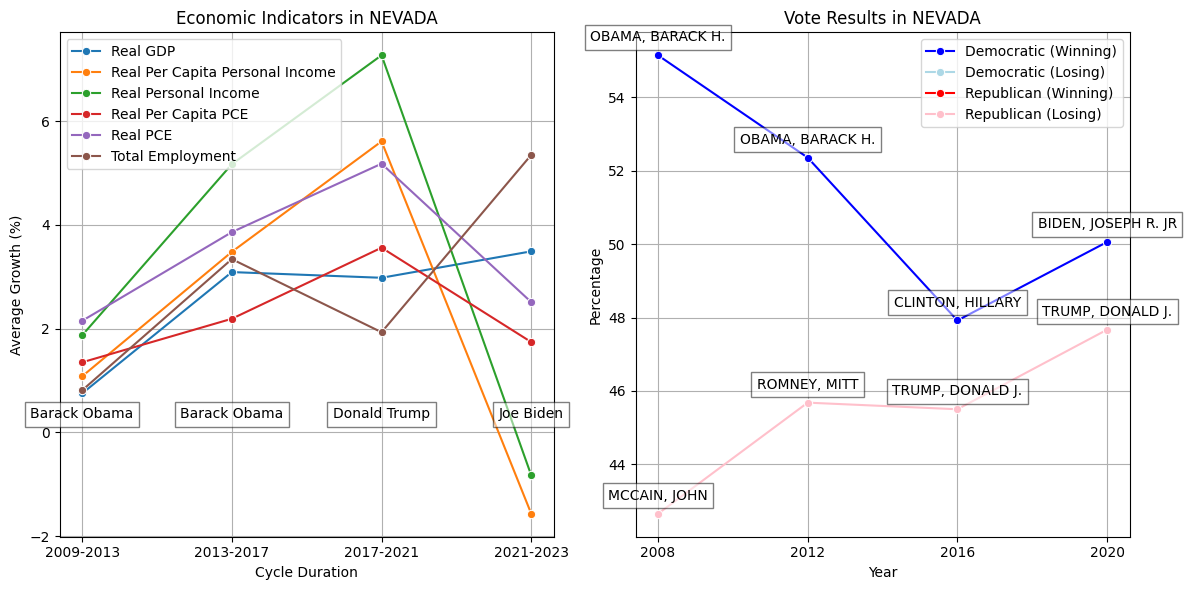

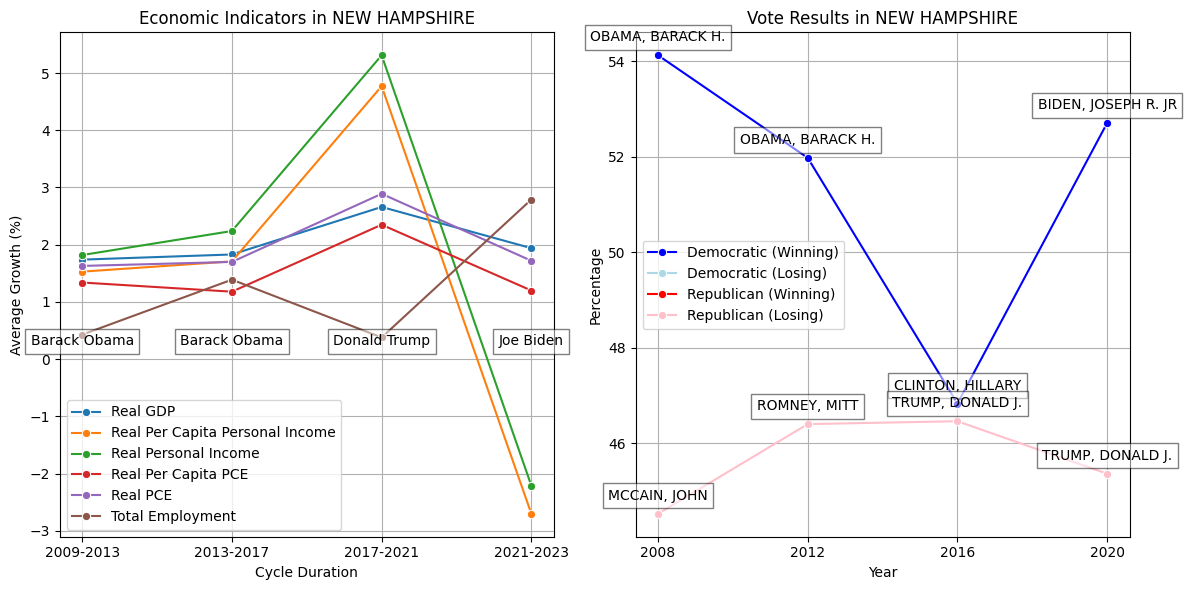

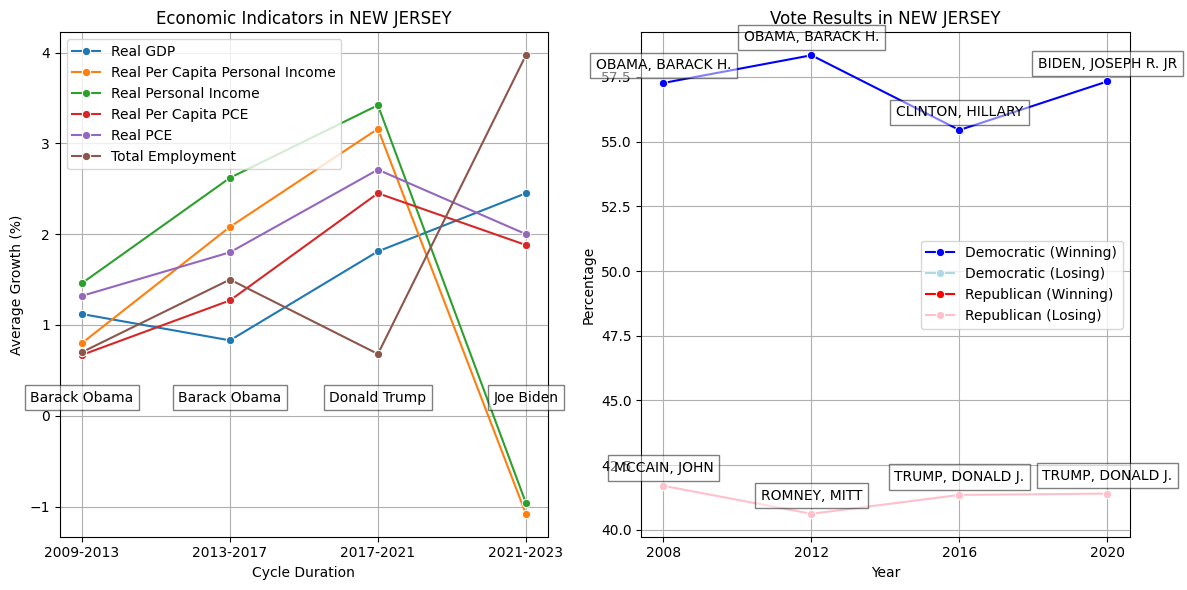

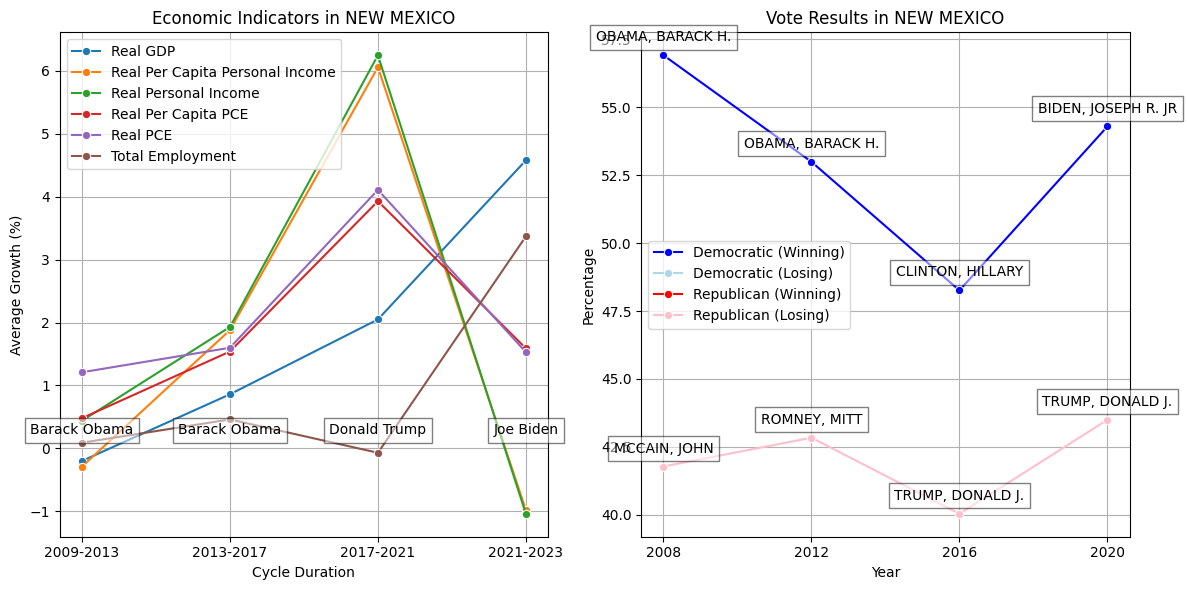

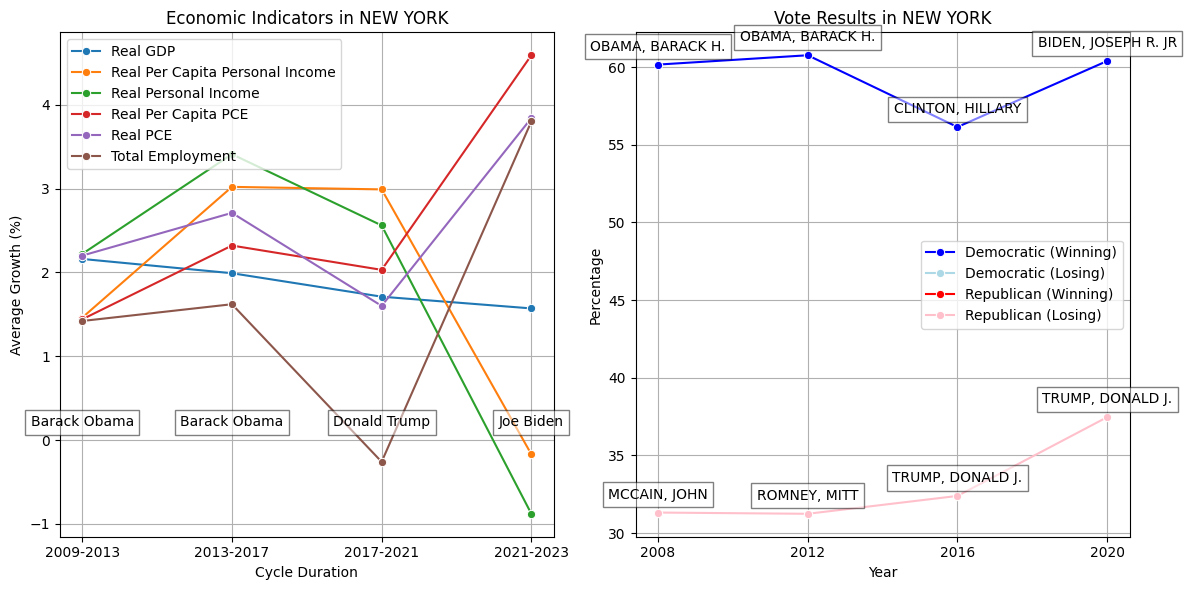

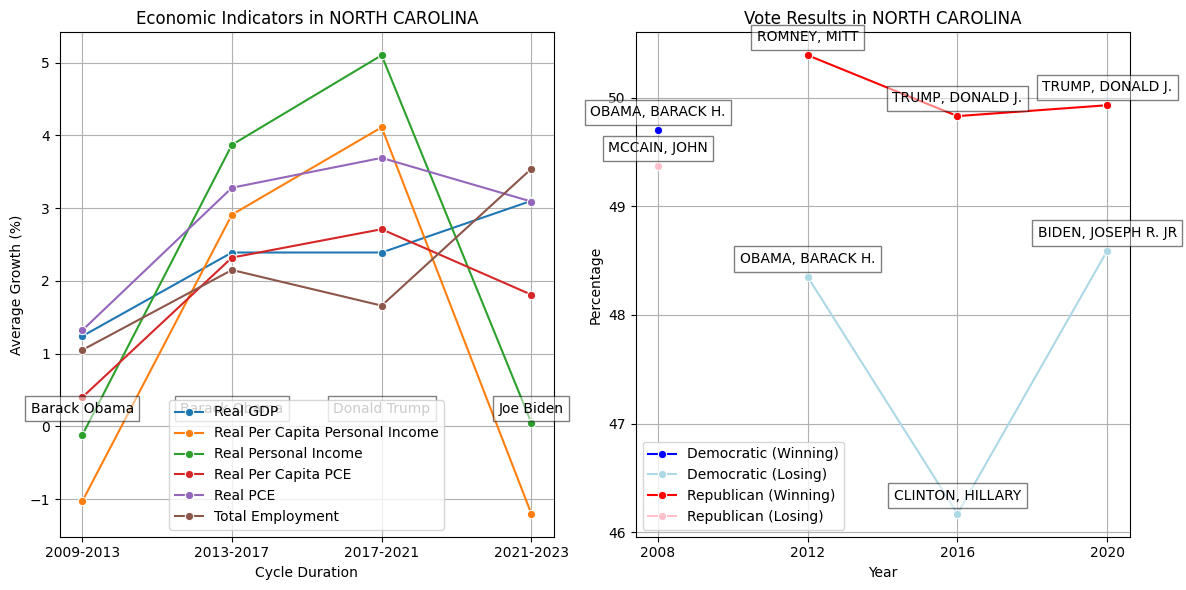

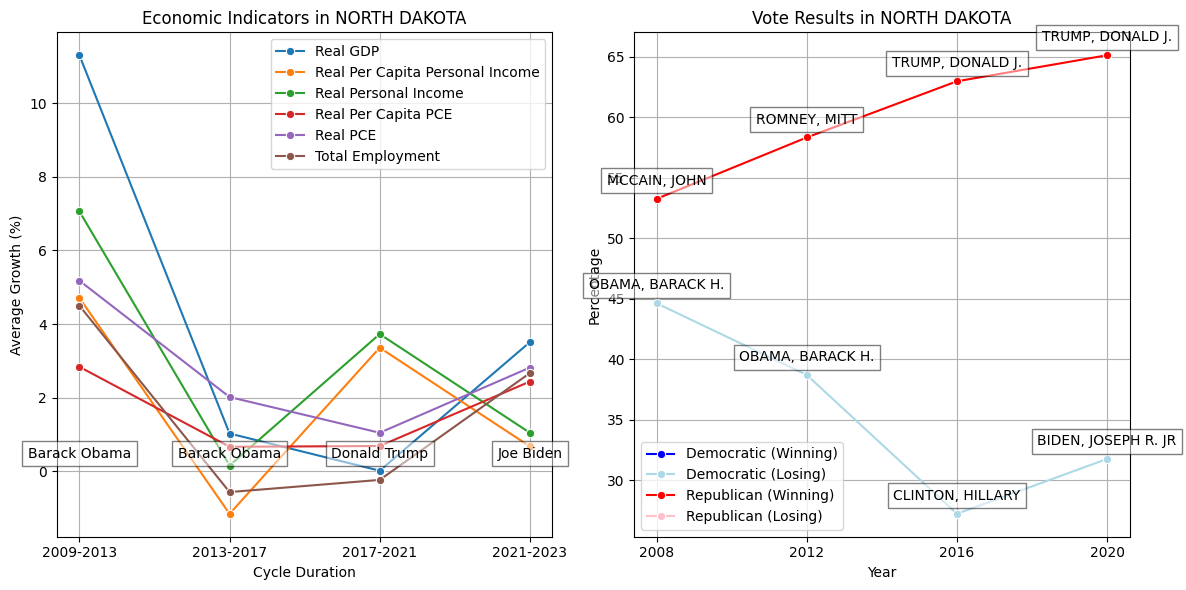

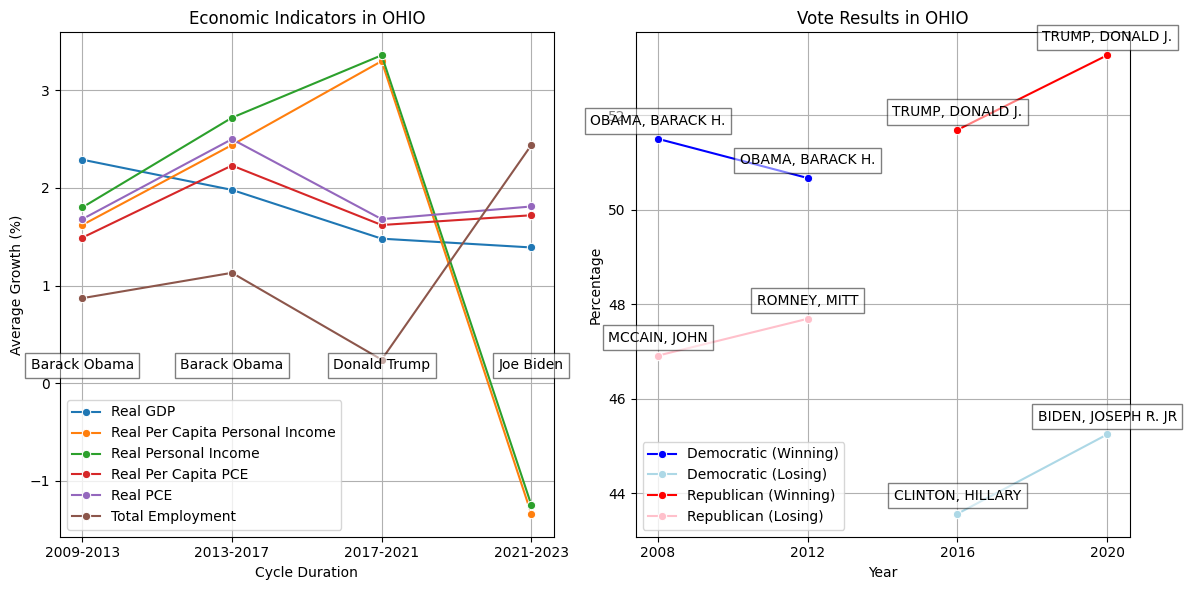

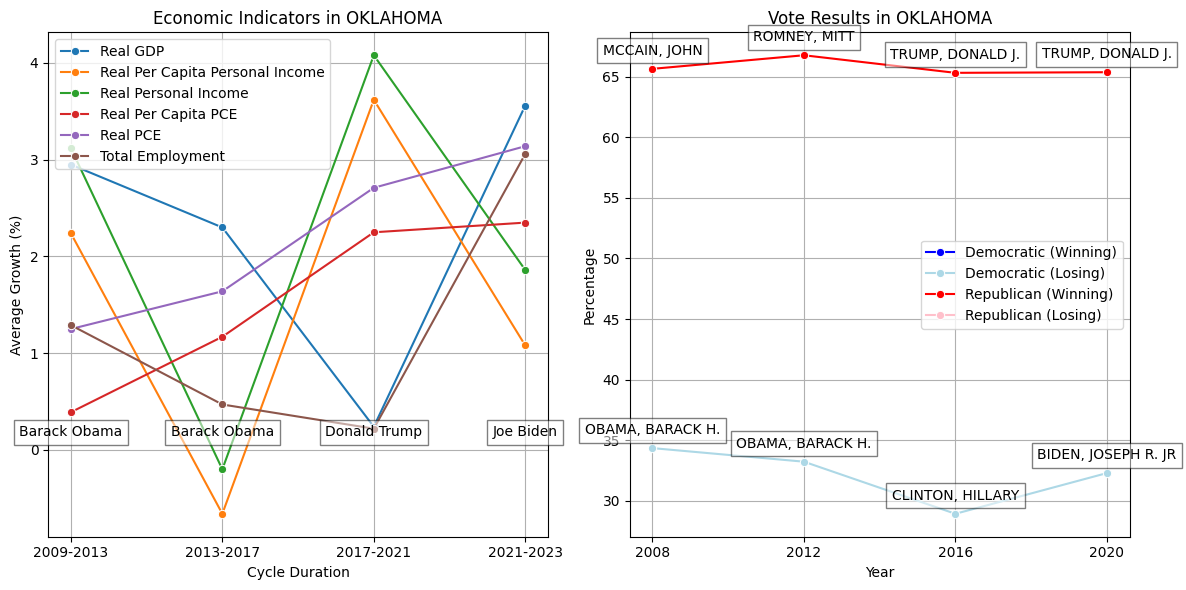

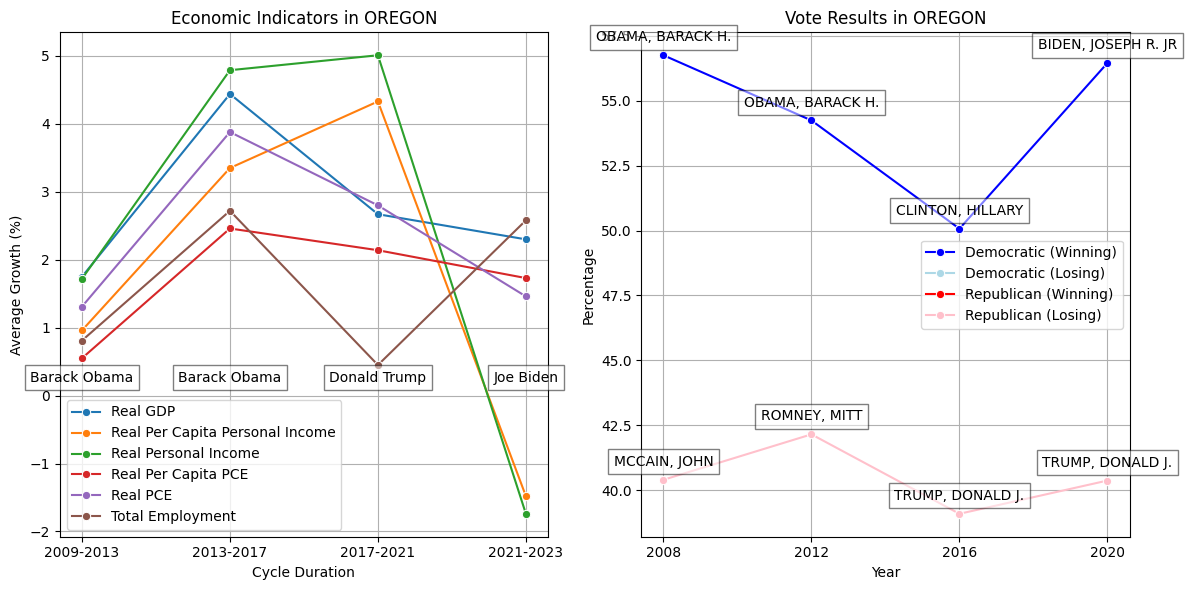

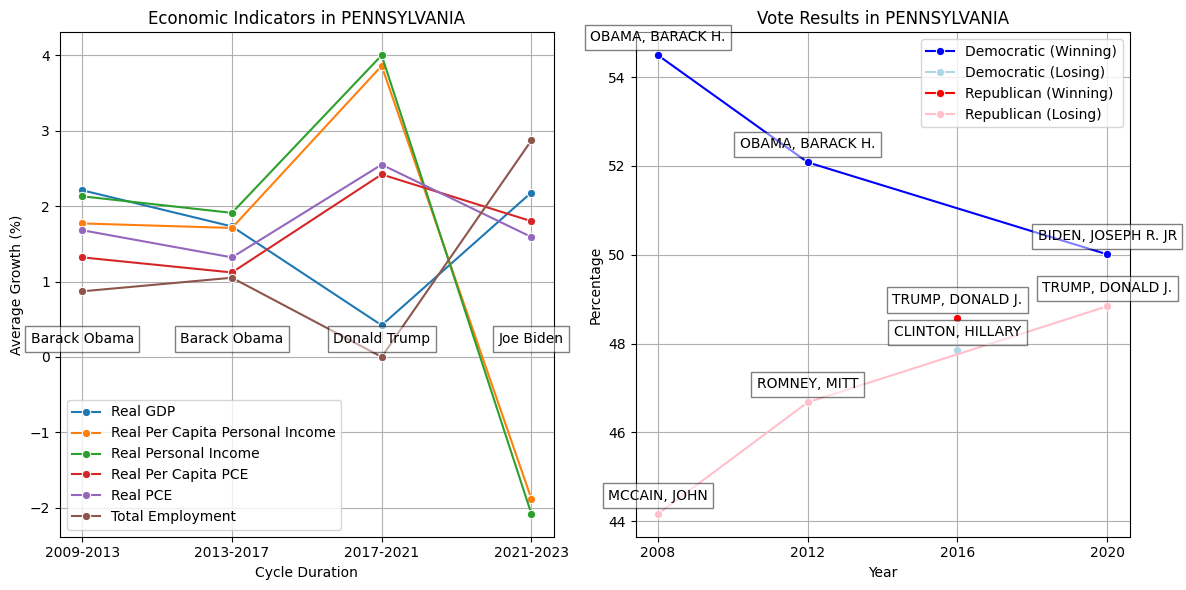

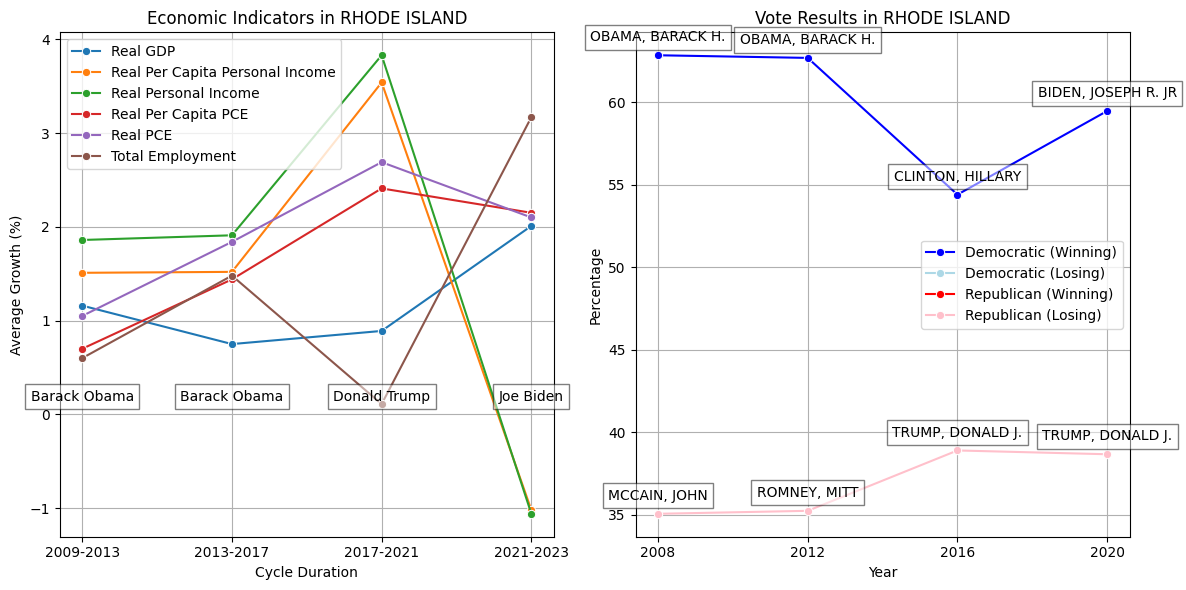

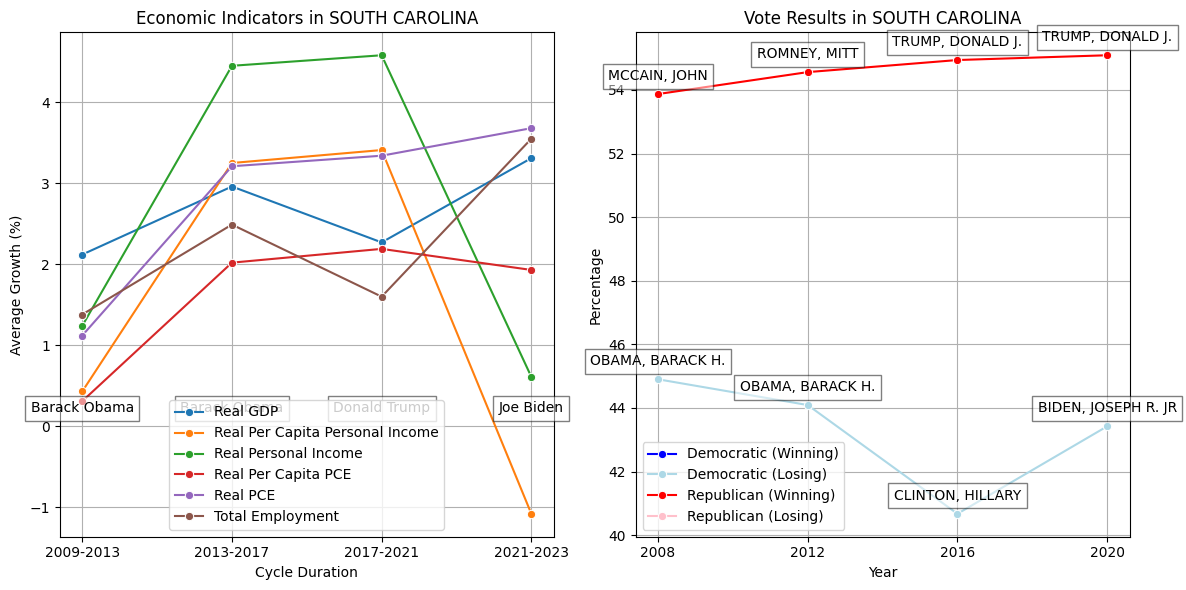

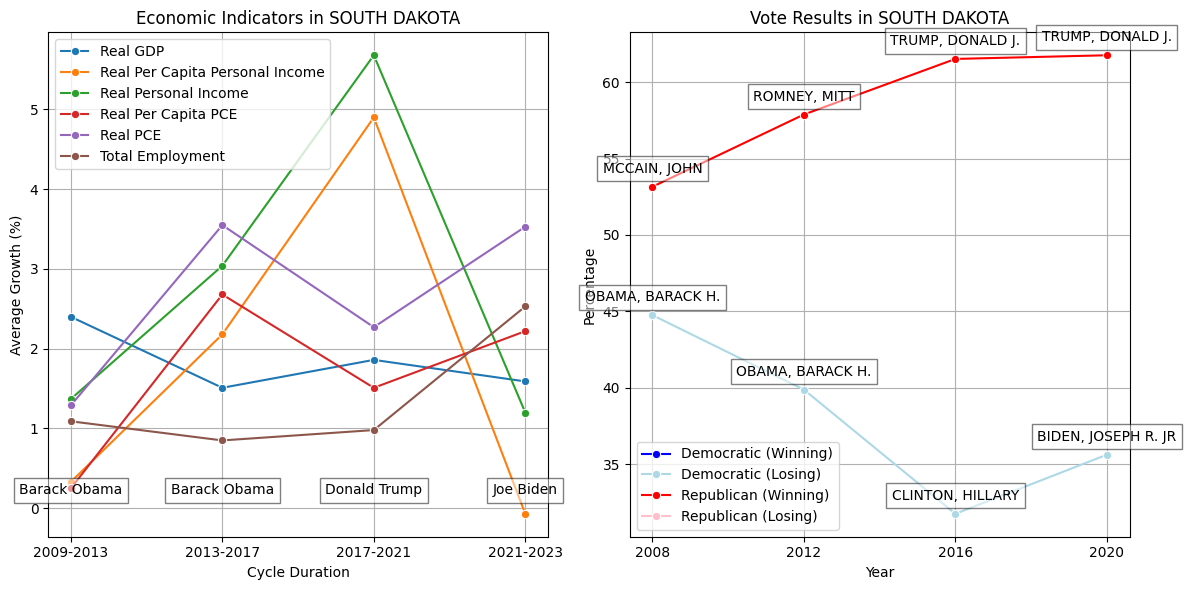

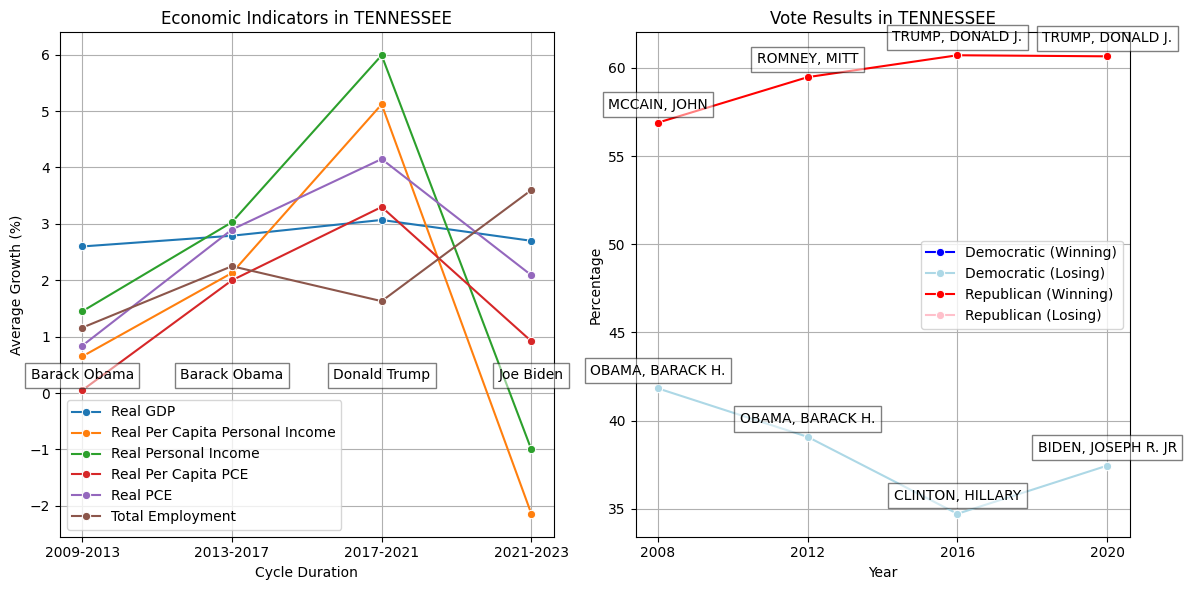

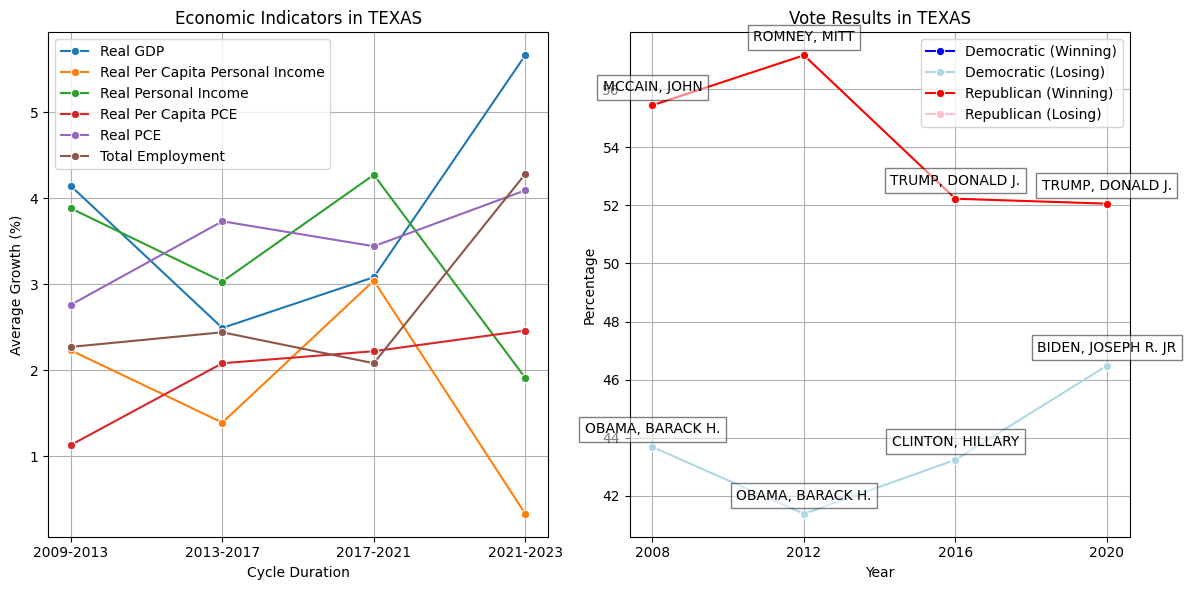

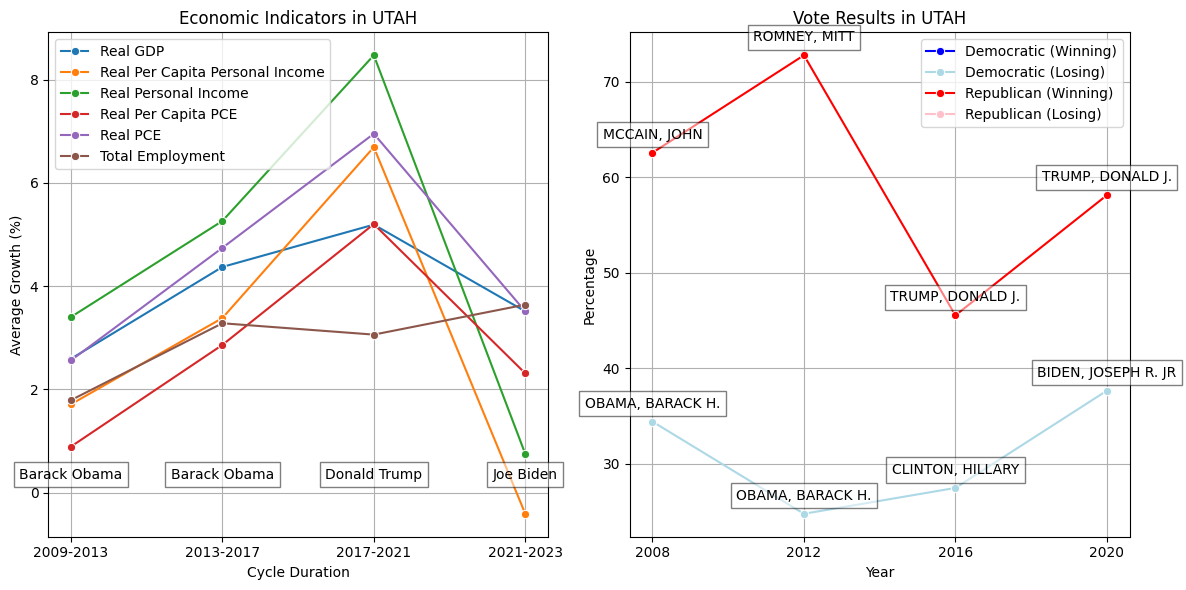

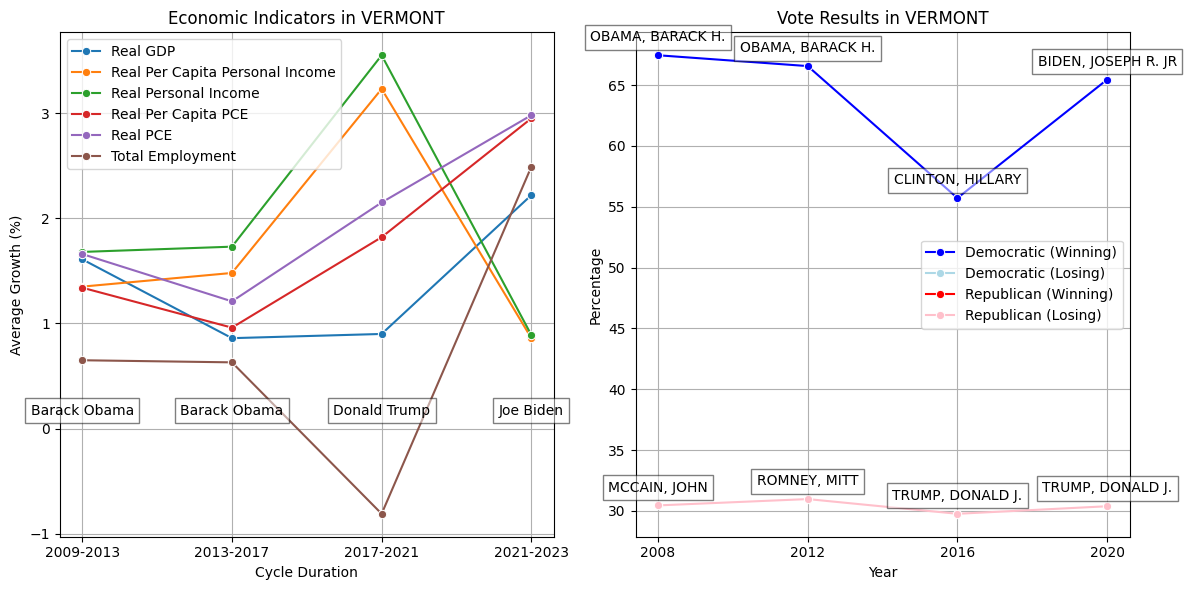

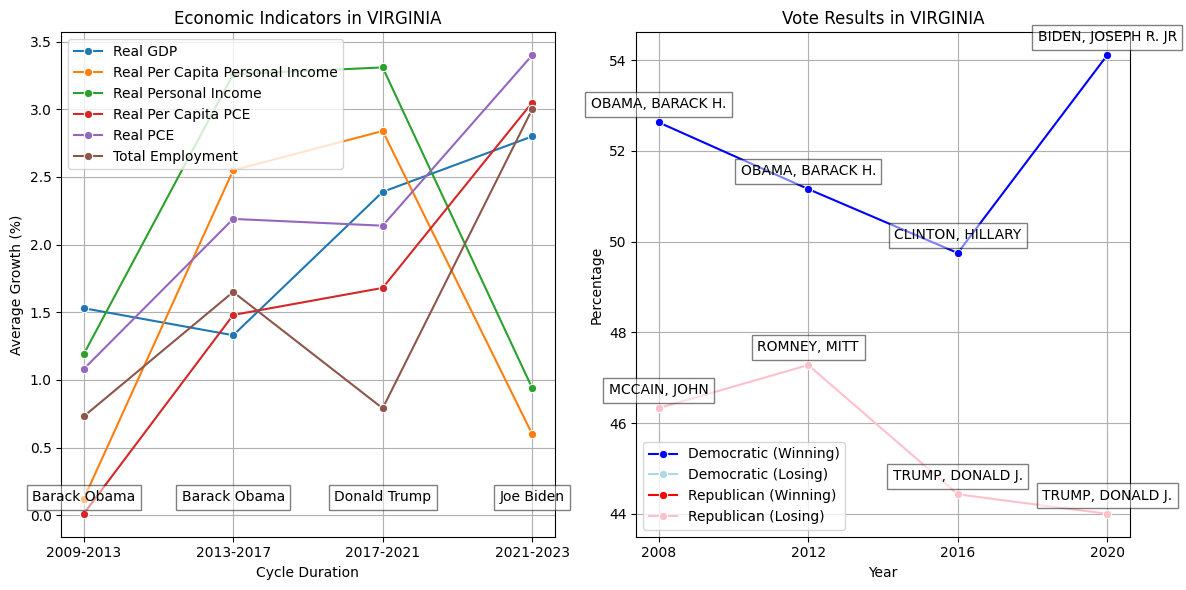

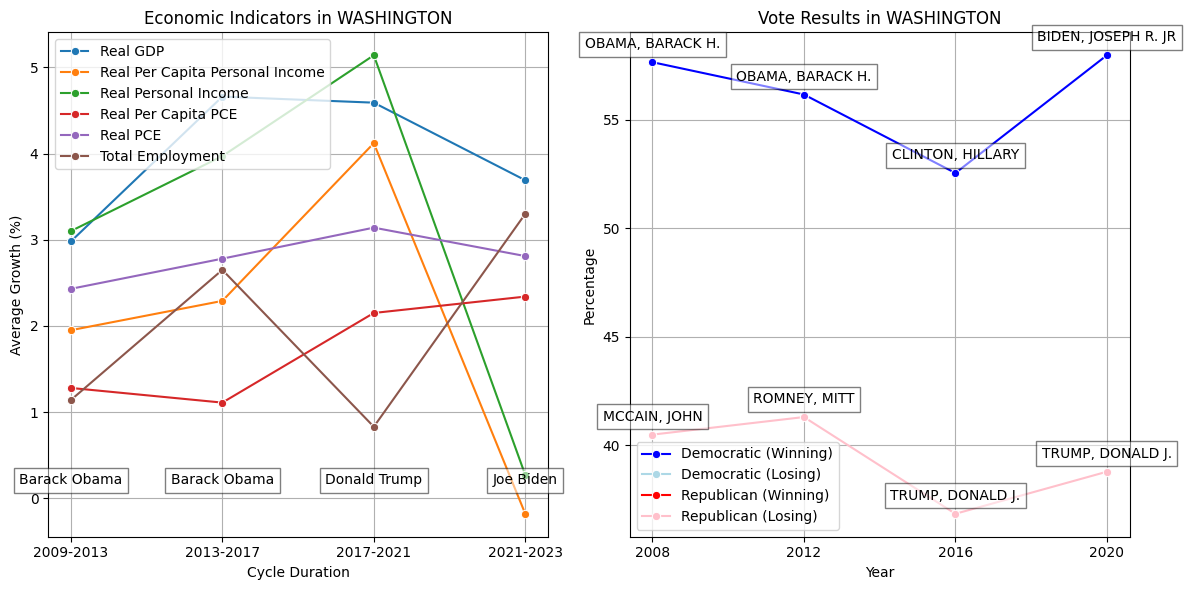

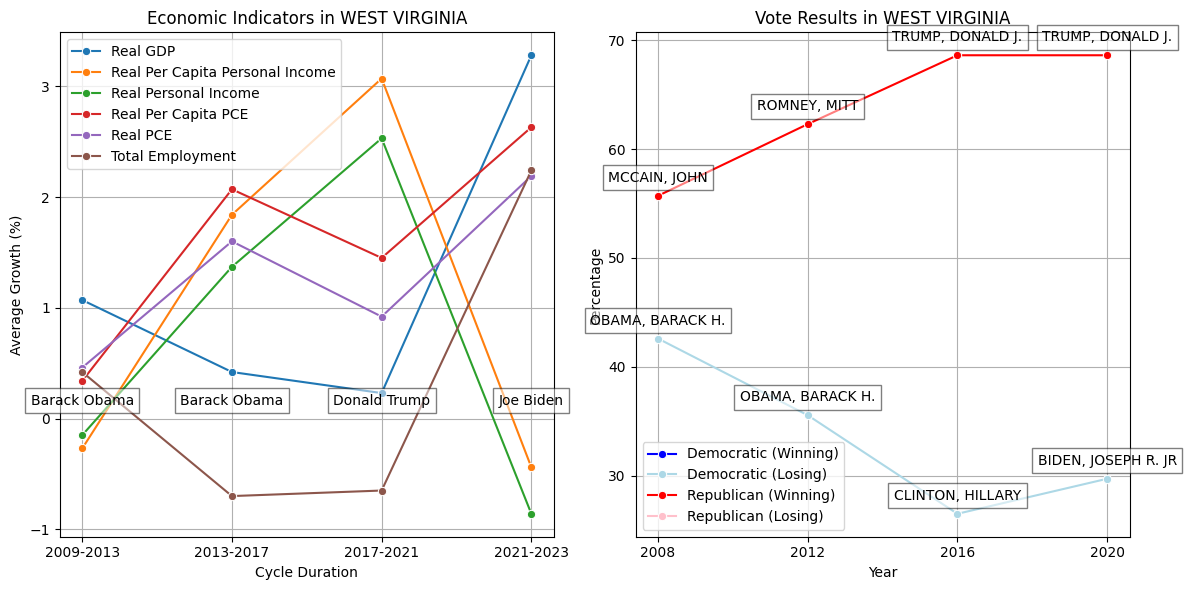

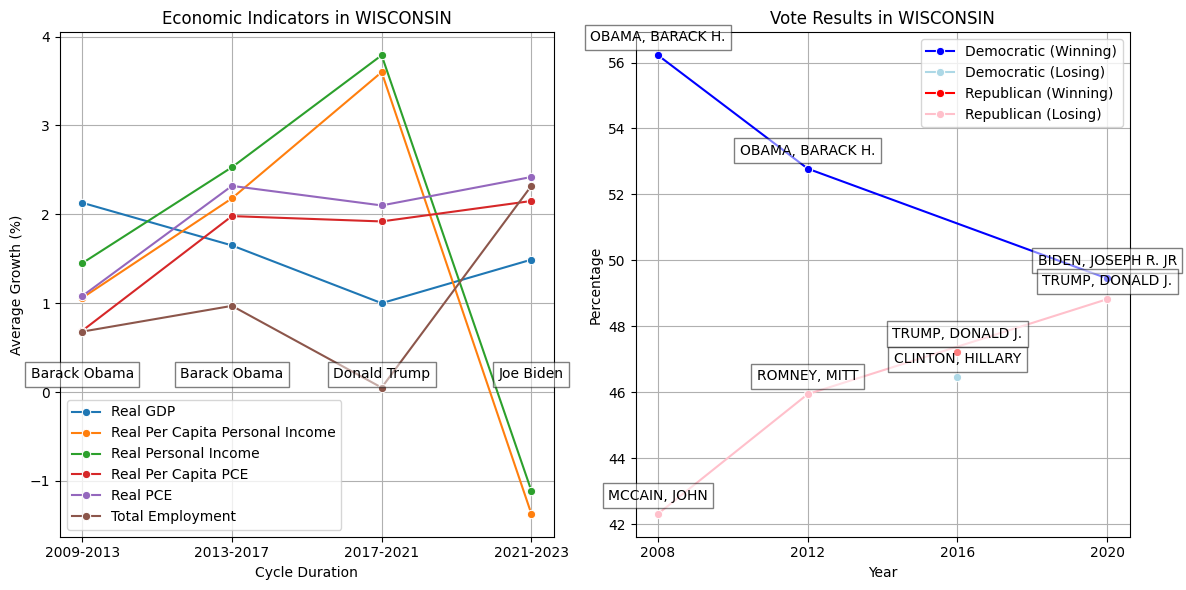

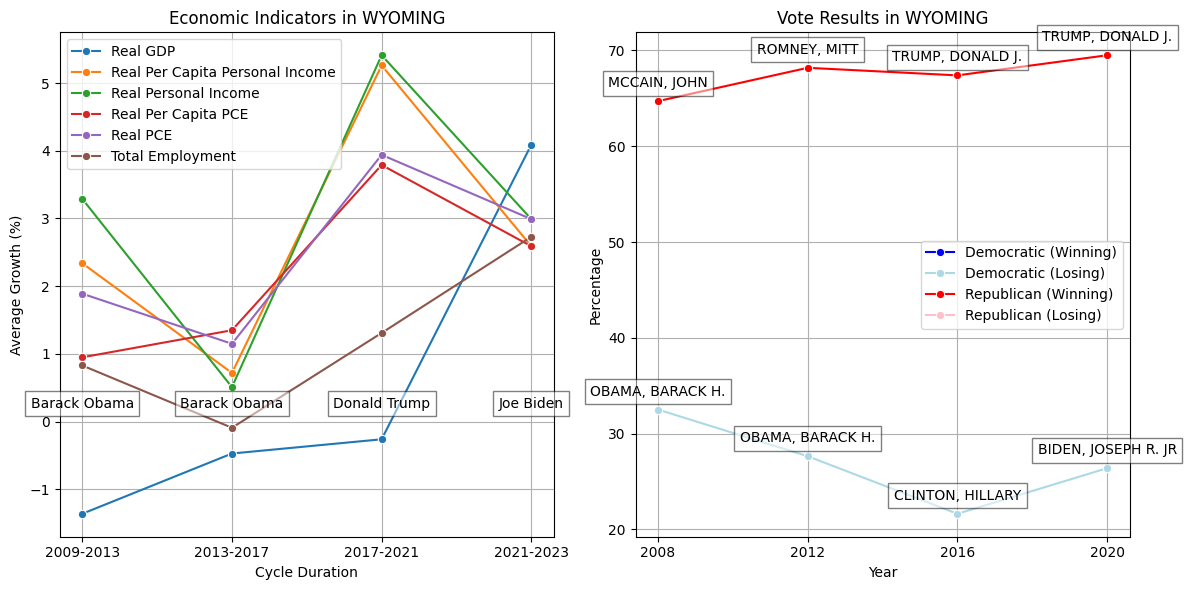

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


def plot_multiple_time_series(ax, data, state, indicators, title, xlabel, ylabel):
    for indicator in indicators:
        indicator_data = data[(data['State'] == state) & (data['Indicator'] == indicator)]
        sns.lineplot(data=indicator_data, x='Cycle Duration', y='Average Growth (%)', marker='o', label=indicator, ax=ax)
    
    # Annotate the president's name for each cycle term
    cycle_terms = data[(data['State'] == state) & (data['Indicator'] == indicators[0])]
    for i, row in cycle_terms.iterrows():
        ax.annotate(row['President'], (row['Cycle Duration'], 0), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

def plot_party_trends(ax, data, state, office, title, xlabel, ylabel):
    # Plot Democratic trend
    dem_winning_data = data[data['Winning Party'] == 'DEMOCRAT']
    dem_losing_data = data[data['Losing Party'] == 'DEMOCRAT']
    sns.lineplot(data=dem_winning_data, x='Year', y='Winning Percentage', marker='o', label='Democratic (Winning)', color='blue', ax=ax)
    sns.lineplot(data=dem_losing_data, x='Year', y='Losing Percentage', marker='o', label='Democratic (Losing)', color='lightblue', ax=ax)
    
    # Plot Republican trend
    rep_winning_data = data[data['Winning Party'] == 'REPUBLICAN']
    sns.lineplot(data=rep_winning_data, x='Year', y='Winning Percentage', marker='o', label='Republican (Winning)', color='red', ax=ax)
    rep_losing_data = data[data['Losing Party'] == 'REPUBLICAN']
    sns.lineplot(data=rep_losing_data, x='Year', y='Losing Percentage', marker='o', label='Republican (Losing)', color='pink', ax=ax)
    
    # Annotate the points with the winning candidate's name
    for i, row in data.iterrows():
        ax.annotate(row['Winning Candidate'], (row['Year'], row['Winning Percentage']), textcoords="offset points", xytext=(0,10), ha='center',fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
        ax.annotate(row['Losing Candidate'], (row['Year'], row['Losing Percentage']), textcoords="offset points", xytext=(0,10), ha='center',fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)
    
    # Customize the x-axis to show every 4 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

# Define the indicators
indicators = ['Real GDP', 'Real Per Capita Personal Income', 'Real Personal Income', 'Real Per Capita PCE', 'Real PCE', 'Total Employment']

# Normalize the state names
# Convert state names to uppercase for consistency
economic_data['State'] = economic_data['State'].str.upper()
electoral_data['State'] = electoral_data['State'].str.upper()
# List of states including D.C.
statesElect = electoral_data['State'].str.upper().unique()
statesEcon = economic_data['State'].str.upper().unique()



for state in statesEcon:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # One row, two columns for subplots
    
    # Filter data for the current state
    state_data = electoral_data[(electoral_data['State'] == state) & (electoral_data['Office'] == 'US PRESIDENT')]
    economic_state_data = economic_data[economic_data['State'] == state]
 
    
    # Plot the economic indicators
    plot_multiple_time_series(
        ax=axs[0],
        data=economic_state_data,
        state=state,
        indicators=indicators,
        title=f'Economic Indicators in {state}',
        xlabel='Cycle Duration',
        ylabel='Average Growth (%)'
    )
    
    # Plot the electoral results
    plot_party_trends(
        ax=axs[1],
        data=state_data,
        state=state,
        office='US PRESIDENT',
        title=f'Vote Results in {state}',
        xlabel='Year',
        ylabel='Percentage'
    )

    plt.tight_layout()
    #plt.show()  # Display each state's plot separately
    data_image_dir = '/workspaces/Electoral-Economic-Analysis/data_image'
    fig.savefig(f'{data_image_dir}/{state}_economic_and_electoral_analysis.png', dpi=300)  # Save the figure
    plt.close(fig)  # Close the figure to free up memory
print("Plots generated and saved for each state.")